# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [7]:
# Try loading one file

df = pd.read_parquet('C:\\jitsa\\NYC_Project\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records\\2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [11]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('C:/Jitsa/NYC_Project/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        monthly_data = pd.read_parquet(file_path)
        # Converting PickUp Date & Time to Date & Time Object
        monthly_data['tpep_pickup_datetime'] = pd.to_datetime(monthly_data['tpep_pickup_datetime'])

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in monthly_data['tpep_pickup_datetime'].dt.date.unique():
            daily_df = monthly_data[monthly_data['tpep_pickup_datetime'].dt.date == date]
            # Iterate through each hour of the selected date
            for hour in range(24):
                hourly_df = daily_df[daily_df['tpep_pickup_datetime'].dt.hour == hour]
                # Sample 5% of the hourly data randomly
                if not hourly_df.empty:  # Check if the hourly dataframe is not empty
                    sampled_hourly_data = hourly_df.sample(frac=0.0079, random_state=42) # Set random_state for reproducibility
                # add data of this hour to the dataframe
                    df = pd.concat([df, sampled_hourly_data], ignore_index=True)
        # Concatenate the sampled data of all the dates to a single dataframe

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

print(f"Shape of the final sampled dataframe: {df.shape}")   

# Now 'df' contains the 0.8% sample from each hour of each day of each month.
# You can save this sampled dataframe
df.reset_index(drop=True, inplace=True)
df.to_csv('sampled_taxi_data.csv', index=False) 


Shape of the final sampled dataframe: (299665, 20)


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [7]:
# Load the new data file
taxi_data = pd.read_csv("C:\\jitsa\\NYC_Project\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records\\sampled_taxi_data.csv")


In [9]:
taxi_data.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN                NaN            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             0        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [11]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299665 entries, 0 to 299664
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               299665 non-null  int64  
 1   tpep_pickup_datetime   299665 non-null  object 
 2   tpep_dropoff_datetime  299665 non-null  object 
 3   passenger_count        289605 non-null  float64
 4   trip_distance          299665 non-null  float64
 5   RatecodeID             289605 non-null  float64
 6   store_and_fwd_flag     289605 non-null  object 
 7   PULocationID           299665 non-null  int64  
 8   DOLocationID           299665 non-null  int64  
 9   payment_type           299665 non-null  int64  
 10  fare_amount            299665 non-null  float64
 11  extra                  299665 non-null  float64
 12  mta_tax                299665 non-null  float64
 13  tip_amount             299665 non-null  float64
 14  tolls_amount           299665 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [13]:
# Fix the index and drop any columns that are not needed
taxi_data.reset_index(drop=True, inplace=True)
taxi_data.columns.tolist()


['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'Airport_fee']

In [17]:
# Drop any columns that are not needed
taxi_data = taxi_data.drop(columns=['store_and_fwd_flag'])
taxi_data.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'Airport_fee']

In [25]:
# Combine the two airport fee columns
taxi_data["airport_fee"] = taxi_data["airport_fee"].fillna(taxi_data["Airport_fee"])
taxi_data = taxi_data.drop(columns=["Airport_fee"])
taxi_data.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
4          19.24         NaN            66           107             0   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0        32.40    6.0      0.5        0.00           0.0   
1         7.90    1.0      0.5        2.58           0.0   
2        11.40    1.0      0.5        0.00           0.0   
3         6.50    1.0      0.5        0.00           0.0   
4        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         41.15                   0.0         1.25  
1                    1.0         15.48                   2.5         0.00  
2                    1.0         16.40                   2.5         0.00  
3                    1.0         11.50                   2.5         0.00  
4                    1.0         35.57                   NaN          NaN

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [41]:
# check where values of fare amount are negative
negative_values = taxi_data[taxi_data["total_amount"]<0]
print(len(negative_values)) # Total negative values
negative_values



11


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
54016          2  2023-11-03 15:51:42   2023-11-03 15:53:00              1.0   
56957          2  2023-11-06 19:30:44   2023-11-06 19:38:21              1.0   
72184          2  2023-11-22 15:44:42   2023-11-22 15:45:57              1.0   
102501         2  2023-12-29 17:32:20   2023-12-29 17:33:49              1.0   
107150         2  2023-03-08 15:51:33   2023-03-08 15:52:12              1.0   
151932         2  2023-06-25 05:59:41   2023-06-25 06:08:22              2.0   
156462         2  2023-06-30 21:37:09   2023-06-30 21:46:00              2.0   
157751         2  2023-08-02 16:04:37   2023-08-02 16:04:44              2.0   
207823         2  2023-04-12 19:12:27   2023-04-12 19:37:09              1.0   
230217         2  2023-05-09 17:05:56   2023-05-09 17:24:59              1.0   
244298         2  2023-05-19 14:53:56   2023-05-19 14:54:03              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
54016            0.21         2.0           246           246             2   
56957            0.48         1.0            75            75             2   
72184            0.05         2.0           132           132             4   
102501           0.02         1.0           161           161             2   
107150           0.00         1.0           231           231             2   
151932           1.09         2.0            90           170             2   
156462           1.38         2.0           249           186             2   
157751           0.01         2.0           237           237             2   
207823           3.61         1.0            68           232             2   
230217           8.35         1.0           132           222             2   
244298           0.00         1.0           193           193             2   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
54016           0.0    0.0     -0.5         0.0           0.0   
56957           0.0    0.0     -0.5         0.0           0.0   
72184           0.0    0.0     -0.5         0.0           0.0   
102501          0.0    0.0     -0.5         0.0           0.0   
107150          0.0    0.0     -0.5         0.0           0.0   
151932          0.0    0.0     -0.5         0.0           0.0   
156462          0.0    0.0     -0.5         0.0           0.0   
157751          0.0    0.0     -0.5         0.0           0.0   
207823          0.0    0.0     -0.5         0.0           0.0   
230217          0.0    0.0     -0.5         0.0           0.0   
244298          0.0    0.0     -0.5         0.0           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
54016                    -1.0         -4.00                  -2.5         0.00  
56957                    -1.0         -1.50                   0.0         0.00  
72184                    -1.0         -3.25                   0.0        -1.75  
102501                   -1.0         -4.00                  -2.5         0.00  
107150                   -1.0         -1.50                   0.0         0.00  
151932                   -1.0         -4.00                  -2.5         0.00  
156462                   -1.0         -4.00                  -2.5         0.00  
157751                   -1.0         -4.00                  -2.5         0.00  
207823                   -1.0         -4.00                  -2.5         0.00  
230217                   -1.0         -3.25                   0.0        -1.75  
244298                   -1.0         -1.50                   0.0         0.00

In [43]:
negative_values.shape

(11, 18)

Did you notice something different in the `RatecodeID` column for above records?

In [45]:
# Analyse RatecodeID for the negative fare amounts
negative_values["RatecodeID"].value_counts()


RatecodeID
1.0    6
2.0    5
Name: count, dtype: int64

In [53]:
# Find which columns have negative values

financial_columns= ["fare_amount", "tip_amount", "total_amount", "tolls_amount", "extra", "mta_tax", 
                    'improvement_surcharge', "congestion_surcharge", "airport_fee"] # Array of the columns with finiancial value.
All_negative_values = (taxi_data[financial_columns]<0).sum()
All_negative_values[All_negative_values>0]

total_amount             11
extra                     1
mta_tax                  11
improvement_surcharge    11
congestion_surcharge      6
airport_fee               2
dtype: int64

In [59]:
# fix these negative values
taxi_data [financial_columns] = taxi_data[financial_columns].abs() #converts all negative values in the financial columns to their absolute values
All_negative_values = (taxi_data[financial_columns]<0).sum()
All_negative_values[All_negative_values>0]

Series([], dtype: int64)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [63]:
# Find the proportion of missing values in each column
null_value_counts = taxi_data.isnull().sum() # missing value count
null_value_counts[null_value_counts>0]


passenger_count         10060
RatecodeID              10060
congestion_surcharge    10060
airport_fee             10060
dtype: int64

In [65]:
missing_values = null_value_counts / len(taxi_data)
print(missing_values[missing_values > 0]*100) # percentage of missing values

passenger_count         3.357082
RatecodeID              3.357082
congestion_surcharge    3.357082
airport_fee             3.357082
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [69]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
taxi_data[taxi_data["passenger_count"].isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15             2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
45             2  2023-01-01 01:46:00   2023-01-01 02:15:00              NaN   
46             2  2023-01-01 01:10:00   2023-01-01 01:41:00              NaN   
61             2  2023-01-01 01:18:30   2023-01-01 01:46:19              NaN   
...          ...                  ...                   ...              ...   
299508         1  2023-09-30 21:50:20   2023-09-30 22:06:38              NaN   
299572         1  2023-09-30 22:53:15   2023-09-30 23:10:04              NaN   
299617         2  2023-09-30 23:27:39   2023-09-30 23:43:22              NaN   
299636         1  2023-09-30 23:12:36   2023-09-30 23:36:35              NaN   
299653         1  2023-09-30 23:31:35   2023-09-30 23:41:26              NaN   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
4               19.24         NaN            66           107             0   
15              10.77         NaN           151           106             0   
45               4.97         NaN            50           226             0   
46               5.73         NaN           186           255             0   
61               2.98         NaN           137            48             0   
...               ...         ...           ...           ...           ...   
299508           0.00         NaN           249            87             0   
299572           0.00         NaN            48           249             0   
299617           3.01         NaN           163           262             0   
299636           0.00         NaN           161            87             0   
299653           0.00         NaN           249           231             0   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
4             25.64    0.0      0.5        5.93          0.00   
15            45.38    0.0      0.5       11.19          6.55   
45            27.62    0.0      0.5        6.32          0.00   
46            27.32    0.0      0.5        6.26          0.00   
61            27.54    0.0      0.5        3.15          0.00   
...             ...    ...      ...         ...           ...   
299508        19.71    0.0      0.5        0.00          0.00   
299572        21.88    0.0      0.5        0.00          0.00   
299617        22.25    0.0      0.5        5.25          0.00   
299636        31.01    0.0      0.5        0.00          0.00   
299653        20.65    0.0      0.5        0.00          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
4                         1.0         35.57                   NaN          NaN  
15                        1.0         67.12                   NaN          NaN  
45                        1.0         37.94                   NaN          NaN  
46                        1.0         37.58                   NaN          NaN  
61                        1.0         34.69                   NaN          NaN  
...                       ...           ...                   ...          ...  
299508                    1.0         23.71                   NaN          NaN  
299572                    1.0         25.88                   NaN          NaN  
299617                    1.0         31.50                   NaN          NaN  
299636                    1.0         35.01                   NaN          NaN  
299653                    1.0         24.65                   NaN          NaN  

[10060 rows x 18 columns]

In [71]:
print("passenger count median-",taxi_data["passenger_count"].median(),"\n","passenger count mode-",taxi_data["passenger_count"].mode()[0])

passenger count median- 1.0 
 passenger count mode- 1.0


In [73]:
taxi_data["passenger_count"].fillna(taxi_data["passenger_count"].mode()[0], inplace=True) #Replacing passenger count with NA
taxi_data[taxi_data["passenger_count"].isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

Did you find zeroes in passenger_count? Handle these.

In [79]:
passenger_zero_count = (taxi_data["passenger_count"]==0).sum()
print("Number of zeroes on passenger count",passenger_zero_count)

Number of zeroes on passenger count 4594


In [ ]:
taxi_data["passenger_count"].replace(0, taxi_data["passenger_count"].mode()[0], inplace=True) # replaces zeroes with most occuring mode in passenger count.
taxi_data[taxi_data["passenger_count"].isnull()]

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [81]:
# Fix missing values in 'RatecodeID'
missing_Ratecodeid_count = taxi_data["RatecodeID"].isnull().sum()
missing_Ratecodeid_count

10060

In [83]:
taxi_data["RatecodeID"].fillna(taxi_data["RatecodeID"].mode()[0], inplace=True) # replacing missing values with mode frequently occuring values of that column.
taxi_data[taxi_data["RatecodeID"].isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [85]:
# handle null values in congestion_surcharge
null_congestion_surcharge = taxi_data["congestion_surcharge"].isnull().sum()
null_congestion_surcharge


10060

In [87]:
taxi_data["congestion_surcharge"].fillna(taxi_data["congestion_surcharge"].median(), inplace=True)
taxi_data[taxi_data["congestion_surcharge"].isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [91]:
# Handle any remaining missing values
taxi_data.isnull().sum()


VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
airport_fee              10060
dtype: int64

In [93]:
# Replacing Airport Fee with zero 
taxi_data["airport_fee"].fillna(0, inplace=True)
taxi_data.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [97]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
taxi_data.describe()


VendorID  passenger_count  trip_distance     RatecodeID  \
count  299665.000000    299665.000000  299665.000000  299665.000000   
mean        1.733769         1.355070       3.561563       1.629897   
std         0.447465         0.878592      45.765558       7.380107   
min         1.000000         0.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.050000       1.000000   
50%         2.000000         1.000000       1.790000       1.000000   
75%         2.000000         1.000000       3.400000       1.000000   
max         6.000000         9.000000   22528.820000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  299665.000000  299665.000000  299665.000000  299665.000000   
mean      165.239918     163.919680       1.164784      20.291735   
std        64.053745      69.795146       0.507200     262.120252   
min         1.000000       1.000000       0.000000       0.000000   
25%       132.000000     113.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      21.900000   
max       265.000000     265.000000       4.000000  143163.450000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  299665.000000  299665.000000  299665.000000  299665.000000   
mean        1.585209       0.495376       3.544388       0.591411   
std         1.823511       0.047932       4.049017       2.174562   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.840000       0.000000   
75%         2.500000       0.500000       4.420000       0.000000   
max        14.250000       0.800000     150.290000     143.000000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          299665.000000  299665.000000         299665.000000   
mean                0.999062      29.345586              2.315244   
std                 0.028163     262.466146              0.654032   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.000000              2.500000   
75%                 1.000000      30.800000              2.500000   
max                 1.000000  143167.450000              2.500000   

         airport_fee  
count  299665.000000  
mean        0.137499  
std         0.456528  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.750000

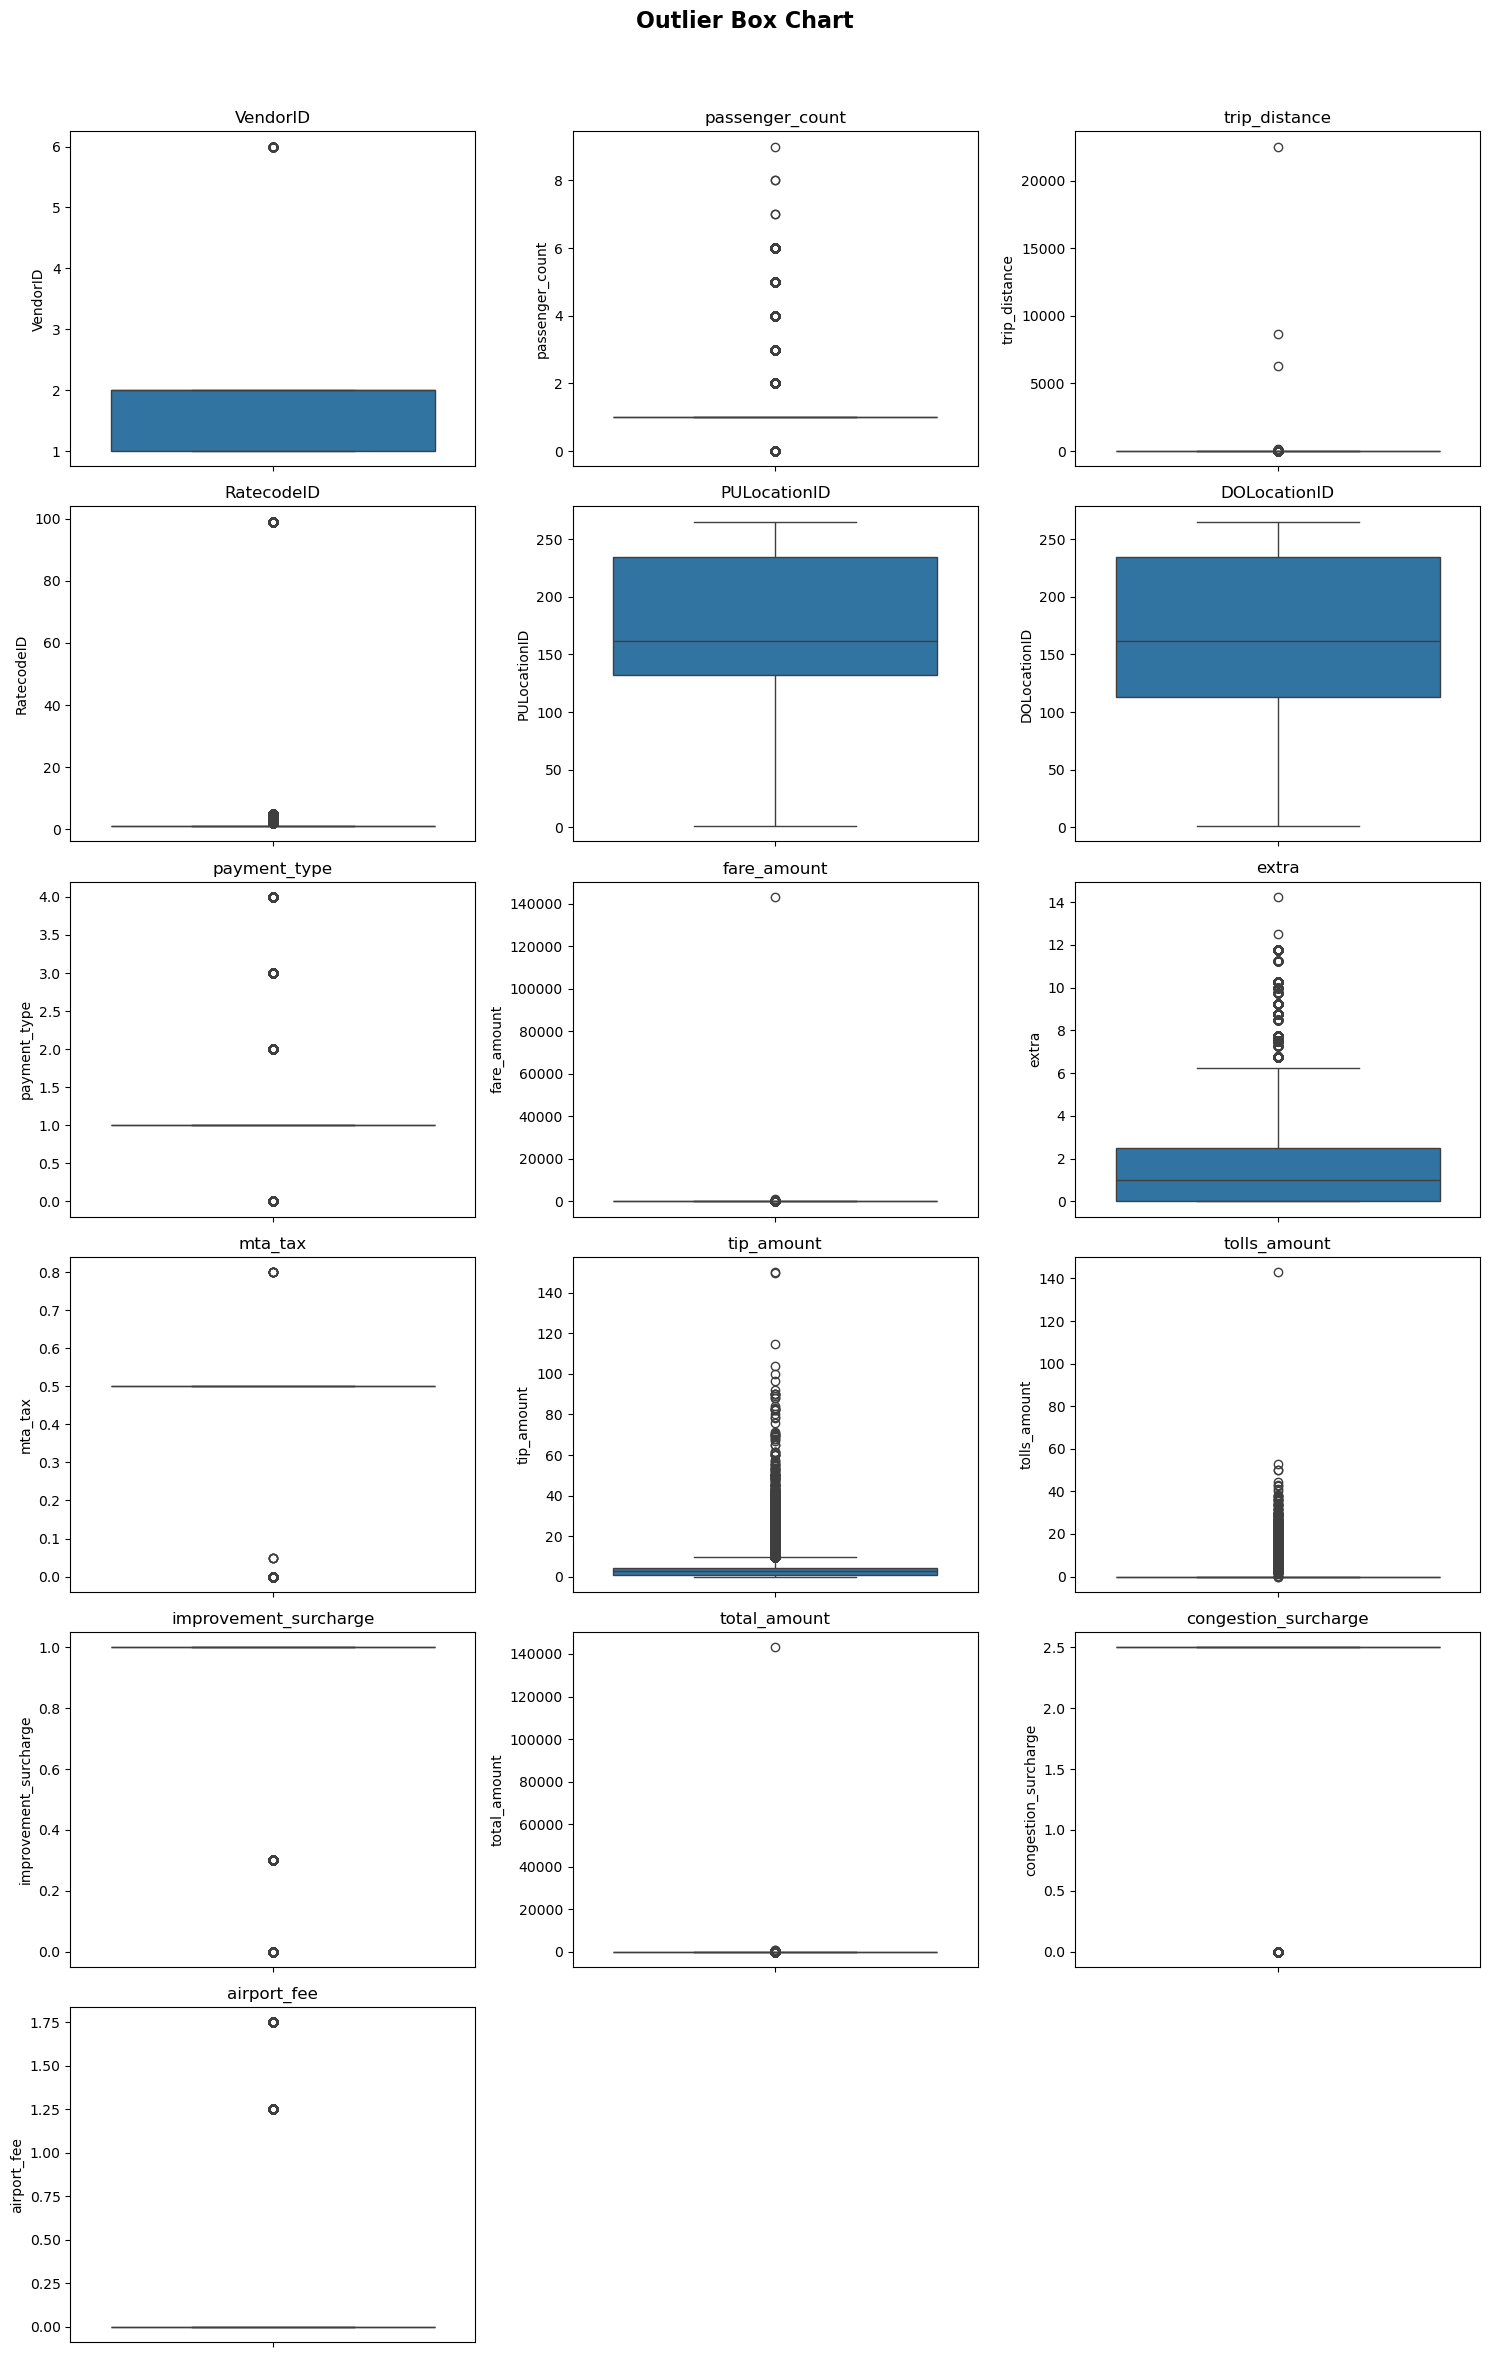

In [107]:
numeric_data = taxi_data.select_dtypes(include=['number'])
num_numeric_columns = len(numeric_data.columns)
num_rows = (num_numeric_columns // 3) + (num_numeric_columns % 3 > 0)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 4))
fig.suptitle("Outlier Box Chart", fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, column in enumerate(numeric_data.columns):
    sns.boxplot(data=numeric_data[column], ax=axes[i])
    axes[i].set_title(column, fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel(column, fontsize=10)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [109]:
# Handling outliers in passenger count 
(taxi_data['passenger_count'] > 6).sum()

5

In [111]:
taxi_data[taxi_data['passenger_count'] > 6]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
76680          2  2023-11-30 00:13:36   2023-11-30 00:13:39              8.0   
194871         2  2023-02-19 17:19:13   2023-02-19 17:57:24              9.0   
210680         2  2023-04-09 09:22:54   2023-04-09 09:23:22              7.0   
252466         2  2023-05-29 02:35:04   2023-05-29 02:35:16              7.0   
291854         2  2023-09-18 13:07:26   2023-09-18 14:05:27              8.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
76680            0.00         5.0            90           264             1   
194871          16.79         5.0           186             1             1   
210680           0.00         5.0           125           125             1   
252466           0.00         5.0           256           256             1   
291854          31.71         5.0            48           219             1   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
76680          86.0    0.0      0.5        5.00          0.00   
194871         90.0    0.0      0.0       18.00         14.75   
210680         80.0    0.0      0.5        0.00         21.25   
252466         75.0    0.0      0.0        0.02          0.00   
291854         88.9    0.0      0.5       10.00         11.19   

        improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
76680                     1.0         92.50                   0.0          0.0  
194871                    1.0        123.75                   0.0          0.0  
210680                    1.0        105.25                   2.5          0.0  
252466                    1.0         76.02                   0.0          0.0  
291854                    1.0        114.09                   2.5          0.0

In [113]:
# remove passenger count > 6
taxi_data.drop(taxi_data[taxi_data['passenger_count'] > 6].index, inplace=True)
taxi_data[taxi_data['passenger_count'] > 6]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [115]:
# Continue with outlier handling
taxi_data.describe()


VendorID  passenger_count  trip_distance     RatecodeID  \
count  299660.000000    299660.000000  299660.000000  299660.000000   
mean        1.733765         1.354962       3.561460       1.629840   
std         0.447467         0.878200      45.765903       7.380155   
min         1.000000         0.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.050000       1.000000   
50%         2.000000         1.000000       1.790000       1.000000   
75%         2.000000         1.000000       3.400000       1.000000   
max         6.000000         6.000000   22528.820000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  299660.000000  299660.000000  299660.000000  299660.000000   
mean      165.240322     163.919529       1.164787      20.290673   
std        64.053506      69.794543       0.507203     262.122308   
min         1.000000       1.000000       0.000000       0.000000   
25%       132.000000     113.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      21.900000   
max       265.000000     265.000000       4.000000  143163.450000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  299660.000000  299660.000000  299660.000000  299660.000000   
mean        1.585236       0.495379       3.544337       0.591264   
std         1.823514       0.047915       4.048936       2.174012   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.840000       0.000000   
75%         2.500000       0.500000       4.420000       0.000000   
max        14.250000       0.800000     150.290000     143.000000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          299660.000000  299660.000000         299660.000000   
mean                0.999062      29.344369              2.315266   
std                 0.028163     262.468158              0.653996   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.000000              2.500000   
75%                 1.000000      30.800000              2.500000   
max                 1.000000  143167.450000              2.500000   

         airport_fee  
count  299660.000000  
mean        0.137502  
std         0.456532  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.750000

In [117]:
# Entries where trip_distance is nearly 0 and fare_amount is more than 300
print("Total trips where trip_distance ≈ 0 and fare_amount > 300:-",((taxi_data['trip_distance'] < 0.1) & (taxi_data['fare_amount'] > 300)).sum())
taxi_data[((taxi_data['trip_distance'] < 0.1) & (taxi_data['fare_amount'] > 300))]

Total trips where trip_distance ≈ 0 and fare_amount > 300:- 6


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
84212          2  2023-12-07 23:39:43   2023-12-07 23:39:59              1.0   
100809         2  2023-12-24 14:01:07   2023-12-24 14:01:44              1.0   
148451         2  2023-06-21 12:05:21   2023-06-21 12:05:42              1.0   
155671         2  2023-06-29 20:56:07   2023-06-29 20:56:15              1.0   
185142         1  2023-02-09 07:37:30   2023-02-09 07:39:13              1.0   
206242         2  2023-04-05 21:16:43   2023-04-05 21:25:57              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
84212             0.0         5.0           265           265             2   
100809            0.0         5.0            14            14             1   
148451            0.0         5.0           265           265             2   
155671            0.0         5.0           265           265             1   
185142            0.0         5.0           246           246             4   
206242            0.0         5.0           265           265             2   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
84212         319.0    0.0      0.0         0.0           0.0   
100809        417.0    0.0      0.0         0.0           0.0   
148451        500.0    0.0      0.0         0.0           0.0   
155671        350.0    0.0      0.0        70.2           0.0   
185142        910.0    0.0      0.0         0.0           0.0   
206242        600.0    0.0      0.0         0.0           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
84212                     1.0         320.0                   0.0          0.0  
100809                    1.0         418.0                   0.0          0.0  
148451                    1.0         501.0                   0.0          0.0  
155671                    1.0         421.2                   0.0          0.0  
185142                    1.0         911.0                   0.0          0.0  
206242                    1.0         601.0                   0.0          0.0

In [119]:
# Remove entries where trip_distance is nearly 0 and fare_amount is more than 300
taxi_data = taxi_data[~((taxi_data['trip_distance'] < 0.1) & (taxi_data['fare_amount'] > 300))]
taxi_data[((taxi_data['trip_distance'] < 0.1) & (taxi_data['fare_amount'] > 300))]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [121]:
# Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
taxi_data[((taxi_data['trip_distance'] == 0) & (taxi_data['fare_amount'] == 0) & (taxi_data['PULocationID'] != taxi_data['DOLocationID']))]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
94450          1  2023-12-18 09:31:12   2023-12-18 09:31:12              1.0   
96406          1  2023-12-20 13:40:27   2023-12-20 13:40:27              1.0   
100455         1  2023-12-27 20:51:43   2023-12-27 21:00:02              3.0   
178735         1  2023-02-01 08:20:36   2023-02-01 08:20:36              6.0   
179096         2  2023-02-01 16:53:34   2023-02-01 16:54:13              1.0   
224984         2  2023-04-28 13:52:30   2023-04-28 14:43:03              1.0   
229339         1  2023-05-02 17:42:04   2023-05-02 17:42:04              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
94450             0.0         5.0           138           264             3   
96406             0.0         5.0           138           264             2   
100455            0.0         5.0           132           215             4   
178735            0.0        99.0           145           264             2   
179096            0.0         1.0           193             7             1   
224984            0.0         1.0           264           255             2   
229339            0.0         5.0            75           264             2   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
94450           0.0   0.00      0.0         0.0           0.0   
96406           0.0   9.25      0.0         0.0           0.0   
100455          0.0   1.75      0.0         0.0           0.0   
178735          0.0   0.00      0.0         0.0           0.0   
179096          0.0   0.00      0.0         0.0           0.0   
224984          0.0   0.00      0.5         0.0           0.0   
229339          0.0   0.00      0.0         0.0           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
94450                     0.0          0.00                   0.0         0.00  
96406                     1.0         10.25                   2.5         1.75  
100455                    1.0          2.75                   0.0         1.75  
178735                    0.0          0.00                   0.0         0.00  
179096                    0.0          0.00                   0.0         0.00  
224984                    1.0          5.75                   2.5         1.75  
229339                    0.0          0.00                   0.0         0.00

In [123]:
# Remove entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
taxi_data = taxi_data[~((taxi_data['trip_distance'] == 0) & 
                        (taxi_data['fare_amount'] == 0) & 
                        (taxi_data['PULocationID'] != taxi_data['DOLocationID']))]
taxi_data[((taxi_data['trip_distance'] == 0) & (taxi_data['fare_amount'] == 0) & (taxi_data['PULocationID'] != taxi_data['DOLocationID']))]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [125]:
# Entries where trip_distance > 250 miles
taxi_data[taxi_data['trip_distance'] >250]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
141460         2  2023-06-13 09:59:00   2023-06-13 10:12:00              1.0   
191926         2  2023-02-17 07:17:00   2023-02-17 07:25:00              1.0   
195068         2  2023-02-19 22:06:00   2023-02-19 22:22:00              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
141460       22528.82         1.0           116           239             0   
191926        8645.77         1.0           238           230             0   
195068        6284.45         1.0           186           236             0   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
141460        17.42    0.0      0.5        0.37           0.0   
191926        13.34    0.0      0.5        4.34           0.0   
195068        16.00    0.0      0.5        0.00           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
141460                    1.0         21.79                   2.5          0.0  
191926                    1.0         21.68                   2.5          0.0  
195068                    1.0         20.00                   2.5          0.0

In [127]:
# Remove rntries where trip_distance > 250 miles
taxi_data = taxi_data[taxi_data['trip_distance'] <= 250]
taxi_data[taxi_data['trip_distance'] >250]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [129]:
#Entries where payment_type is 0
taxi_data[taxi_data['payment_type'] == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
15             2  2023-01-01 00:41:50   2023-01-01 01:14:50              1.0   
45             2  2023-01-01 01:46:00   2023-01-01 02:15:00              1.0   
46             2  2023-01-01 01:10:00   2023-01-01 01:41:00              1.0   
61             2  2023-01-01 01:18:30   2023-01-01 01:46:19              1.0   
...          ...                  ...                   ...              ...   
299508         1  2023-09-30 21:50:20   2023-09-30 22:06:38              1.0   
299572         1  2023-09-30 22:53:15   2023-09-30 23:10:04              1.0   
299617         2  2023-09-30 23:27:39   2023-09-30 23:43:22              1.0   
299636         1  2023-09-30 23:12:36   2023-09-30 23:36:35              1.0   
299653         1  2023-09-30 23:31:35   2023-09-30 23:41:26              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
4               19.24         1.0            66           107             0   
15              10.77         1.0           151           106             0   
45               4.97         1.0            50           226             0   
46               5.73         1.0           186           255             0   
61               2.98         1.0           137            48             0   
...               ...         ...           ...           ...           ...   
299508           0.00         1.0           249            87             0   
299572           0.00         1.0            48           249             0   
299617           3.01         1.0           163           262             0   
299636           0.00         1.0           161            87             0   
299653           0.00         1.0           249           231             0   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
4             25.64    0.0      0.5        5.93          0.00   
15            45.38    0.0      0.5       11.19          6.55   
45            27.62    0.0      0.5        6.32          0.00   
46            27.32    0.0      0.5        6.26          0.00   
61            27.54    0.0      0.5        3.15          0.00   
...             ...    ...      ...         ...           ...   
299508        19.71    0.0      0.5        0.00          0.00   
299572        21.88    0.0      0.5        0.00          0.00   
299617        22.25    0.0      0.5        5.25          0.00   
299636        31.01    0.0      0.5        0.00          0.00   
299653        20.65    0.0      0.5        0.00          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
4                         1.0         35.57                   2.5          0.0  
15                        1.0         67.12                   2.5          0.0  
45                        1.0         37.94                   2.5          0.0  
46                        1.0         37.58                   2.5          0.0  
61                        1.0         34.69                   2.5          0.0  
...                       ...           ...                   ...          ...  
299508                    1.0         23.71                   2.5          0.0  
299572                    1.0         25.88                   2.5          0.0  
299617                    1.0         31.50                   2.5          0.0  
299636                    1.0         35.01                   2.5          0.0  
299653                    1.0         24.65                   2.5          0.0  

[10057 rows x 18 columns]

In [131]:
taxi_data[taxi_data['payment_type'] == 0].describe()

VendorID  passenger_count  trip_distance  RatecodeID  PULocationID  \
count  10057.000000          10057.0   10057.000000     10057.0  10057.000000   
mean       1.637665              1.0       3.401649         1.0    160.633887   
std        0.613399              0.0       4.226823         0.0     72.104182   
min        1.000000              1.0       0.000000         1.0      1.000000   
25%        1.000000              1.0       0.510000         1.0    107.000000   
50%        2.000000              1.0       2.100000         1.0    161.000000   
75%        2.000000              1.0       4.400000         1.0    234.000000   
max        6.000000              1.0      34.030000         1.0    265.000000   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  10057.000000       10057.0  10057.000000  10057.000000  10057.000000   
mean     156.051009           0.0     22.394727      0.167973      0.493984   
std       70.757140           0.0     14.094825      0.729173      0.054516   
min        1.000000           0.0      0.000000      0.000000      0.000000   
25%      107.000000           0.0     12.910000      0.000000      0.500000   
50%      152.000000           0.0     18.580000      0.000000      0.500000   
75%      231.000000           0.0     27.540000      0.000000      0.500000   
max      265.000000           0.0    196.820000      9.250000      0.500000   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  10057.000000  10057.000000           10057.000000  10057.000000   
mean       2.731113      0.605734               0.990962     29.651520   
std        3.422729      2.259705               0.085730     17.508215   
min        0.000000      0.000000               0.000000      0.000000   
25%        0.000000      0.000000               1.000000     18.860000   
50%        2.000000      0.000000               1.000000     24.590000   
75%        4.030000      0.000000               1.000000     34.710000   
max       40.000000     25.000000               1.000000    215.570000   

       congestion_surcharge  airport_fee  
count               10057.0      10057.0  
mean                    2.5          0.0  
std                     0.0          0.0  
min                     2.5          0.0  
25%                     2.5          0.0  
50%                     2.5          0.0  
75%                     2.5          0.0  
max                     2.5          0.0

In [133]:
# Drop the entries where fare_amount and trip distance is zero 
taxi_data = taxi_data[~((taxi_data['trip_distance'] == 0) & (taxi_data['fare_amount'] == 0))]
taxi_data[((taxi_data['payment_type'] == 0) &(taxi_data['trip_distance'] == 0) & (taxi_data['fare_amount'] == 0))]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [137]:
# replace zero payment type with most common payment type
common_payment = taxi_data.loc[taxi_data['payment_type'] != 0, 'payment_type'].mode()[0]
taxi_data['payment_type'].replace(0,common_payment, inplace=True)
taxi_data[taxi_data['payment_type'] == 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [139]:
# Do any columns need standardising?
# Higher Toll Amount
taxi_data[taxi_data['tolls_amount']>100]



VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
219753         1  2023-04-20 18:45:45   2023-04-20 18:46:08              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
219753            0.0         1.0           265           265             1   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
219753          3.0    2.5      0.5         5.0         143.0   

        improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
219753                    1.0         155.0                   0.0          0.0

In [141]:
# Removing higher Toll Amount
taxi_data = taxi_data[taxi_data['tolls_amount']<100]
taxi_data[taxi_data['tolls_amount']>100]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [216]:
# Find the mode (most common value) of RatecodeID
most_common_ratecode = taxi_data.loc[taxi_data['RatecodeID'] <= 6, 'RatecodeID'].mode()[0]

# Replace RatecodeID values greater than 6 with the mode
taxi_data.loc[taxi_data['RatecodeID'] > 6, 'RatecodeID'] = most_common_ratecode

In [218]:
#Impute fare_amount == 0 for trips with trip_distance > 0
# Calculate median fare per mile
median_fare_per_mile = taxi_data[taxi_data['fare_amount'] > 0].groupby('trip_distance')['fare_amount'].median()

# Apply imputation
taxi_data.loc[(taxi_data['fare_amount'] == 0) & (taxi_data['trip_distance'] > 0), 'fare_amount'] = \
    taxi_data['trip_distance'].map(median_fare_per_mile)


In [220]:
taxi_data.describe()

VendorID           tpep_pickup_datetime  passenger_count  \
count  299605.000000                         299605    299605.000000   
mean        1.733803  2023-07-02 20:07:16.929066240         1.354987   
min         1.000000            2023-01-01 00:04:34         0.000000   
25%         1.000000            2023-04-02 16:26:57         1.000000   
50%         2.000000            2023-06-27 15:27:51         1.000000   
75%         2.000000            2023-10-06 19:36:01         1.000000   
max         6.000000            2023-12-31 23:54:03         6.000000   
std         0.447448                            NaN         0.878173   

       trip_distance     RatecodeID   PULocationID   DOLocationID  \
count  299605.000000  299605.000000  299605.000000  299605.000000   
mean        3.437086       1.071397     165.236959     163.913877   
min         0.000000       1.000000       1.000000       1.000000   
25%         1.050000       1.000000     132.000000     113.000000   
50%         1.800000       1.000000     162.000000     162.000000   
75%         3.400000       1.000000     234.000000     234.000000   
max       187.350000       5.000000     265.000000     265.000000   
std         4.516386       0.385498      64.052289      69.792911   

        payment_type    fare_amount          extra        mta_tax  \
count  299605.000000  299602.000000  299605.000000  299605.000000   
mean        1.198221      20.287720       1.585459       0.495447   
min         1.000000       0.010000       0.000000       0.000000   
25%         1.000000       9.300000       0.000000       0.500000   
50%         1.000000      13.500000       1.000000       0.500000   
75%         1.000000      21.900000       2.500000       0.500000   
max         4.000000  143163.450000      14.250000       0.800000   
std         0.459622     262.136651       1.823486       0.047568   

          tip_amount   tolls_amount  improvement_surcharge   total_amount  \
count  299605.000000  299605.000000          299605.000000  299605.000000   
mean        3.544575       0.590895               0.999162      29.338121   
min         0.000000       0.000000               0.000000       0.000000   
25%         1.000000       0.000000               1.000000      15.960000   
50%         2.840000       0.000000               1.000000      21.000000   
75%         4.420000       0.000000               1.000000      30.800000   
max       150.290000      53.000000               1.000000  143167.450000   
std         4.046669       2.158574               0.026331     262.481015   

       congestion_surcharge    airport_fee    pickup_hour  
count         299605.000000  299605.000000  299605.000000  
mean               2.315624       0.137488      14.264094  
min                0.000000       0.000000       0.000000  
25%                2.500000       0.000000      11.000000  
50%                2.500000       0.000000      15.000000  
75%                2.500000       0.000000      19.000000  
max                2.500000       1.750000      23.000000  
std                0.653412       0.456509       5.807853

In [224]:
taxi_data.shape

(299605, 21)

In [266]:
# Remove rows where fare_amount is greater than 1000
taxi_data = taxi_data[taxi_data["fare_amount"] <= 1000]
filtered_taxi_data = filtered_taxi_data[filtered_taxi_data["fare_amount"] <= 1000]


# Verify the changes
print(taxi_data["fare_amount"].describe())  # Summary statistics after removal

count    299601.000000
mean         19.809941
std          18.015383
min           0.010000
25%           9.300000
50%          13.500000
75%          21.900000
max         455.200000
Name: fare_amount, dtype: float64


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [226]:
taxi_data.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_hour',
 'pickup_day',
 'pickup_month']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

### Categorical Variables:
- **VendorID**
- **RatecodeID**
- **PULocationID** (Pickup Location ID)
- **DOLocationID** (Dropoff Location ID)
- **payment_type**

### Numerical Variables:
- **tpep_pickup_datetime** (timestamp)
- **tpep_dropoff_datetime** (timestamp)
- **passenger_count** (discrete numeric)
- **trip_distance** (continuous numeric)
- **pickup_hour** (numeric, extracted from timestamp)
- **trip_duration** (numeric, calculated as the difference between pickup and dropoff times)

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

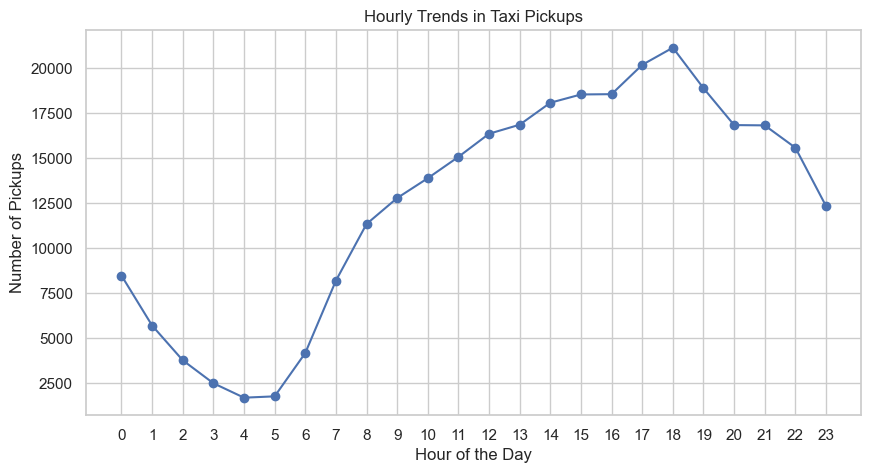

In [250]:
# Find and show the hourly trends in taxi pickups
taxi_data["pickup_hour"] = pd.to_datetime(taxi_data['tpep_pickup_datetime']).dt.hour

# Count the number of pickups per hour
hourly_trend = taxi_data["pickup_hour"].value_counts().sort_index()

# Plot the hourly trends
plt.figure(figsize=(10, 5))

plt.plot(hourly_trend.index, hourly_trend.values, marker="o", linestyle="-", color="b")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.title("Hourly Trends in Taxi Pickups")
plt.xticks(range(24))  # Ensure all hours are displayed
plt.grid(True) 
plt.show()


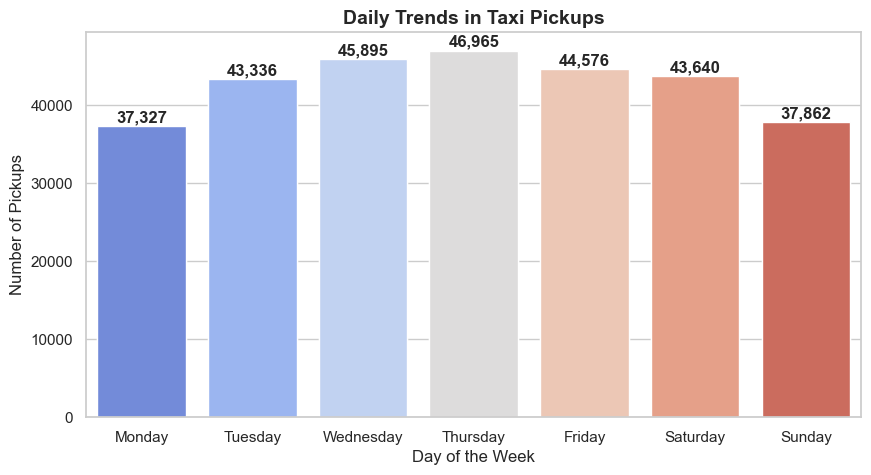

In [252]:
# Find and show the daily trends in taxi pickups (days of the week)

# Extract the hour from the pickup datetime
# Extract the day of the week from the pickup datetime (0=Monday, 6=Sunday)

taxi_data["pickup_day"] = pd.to_datetime(taxi_data["tpep_pickup_datetime"]).dt.dayofweek

day_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
taxi_data["pickup_day"] = taxi_data["pickup_day"].map(lambda x: day_names[x])

# Count the number of pickups per day
daily_trend = taxi_data["pickup_day"].value_counts().reindex(day_names)  # Reorder to start from Monday

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create a colorful bar chart
plt.figure(figsize=(10, 5))
colors = sns.color_palette("coolwarm", len(daily_trend))
ax = sns.barplot(x=daily_trend.index, y=daily_trend.values, palette=colors)

for i, value in enumerate(daily_trend.values):
    ax.text(i, value + 500, f"{value:,}", ha="center", fontsize=12, fontweight="bold")
sns.barplot(x=daily_trend.index, y=daily_trend.values, palette=colors)


# Labels and title
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Pickups", fontsize=12)
plt.title("Daily Trends in Taxi Pickups", fontsize=14, fontweight="bold")

# Show the plot
plt.show()



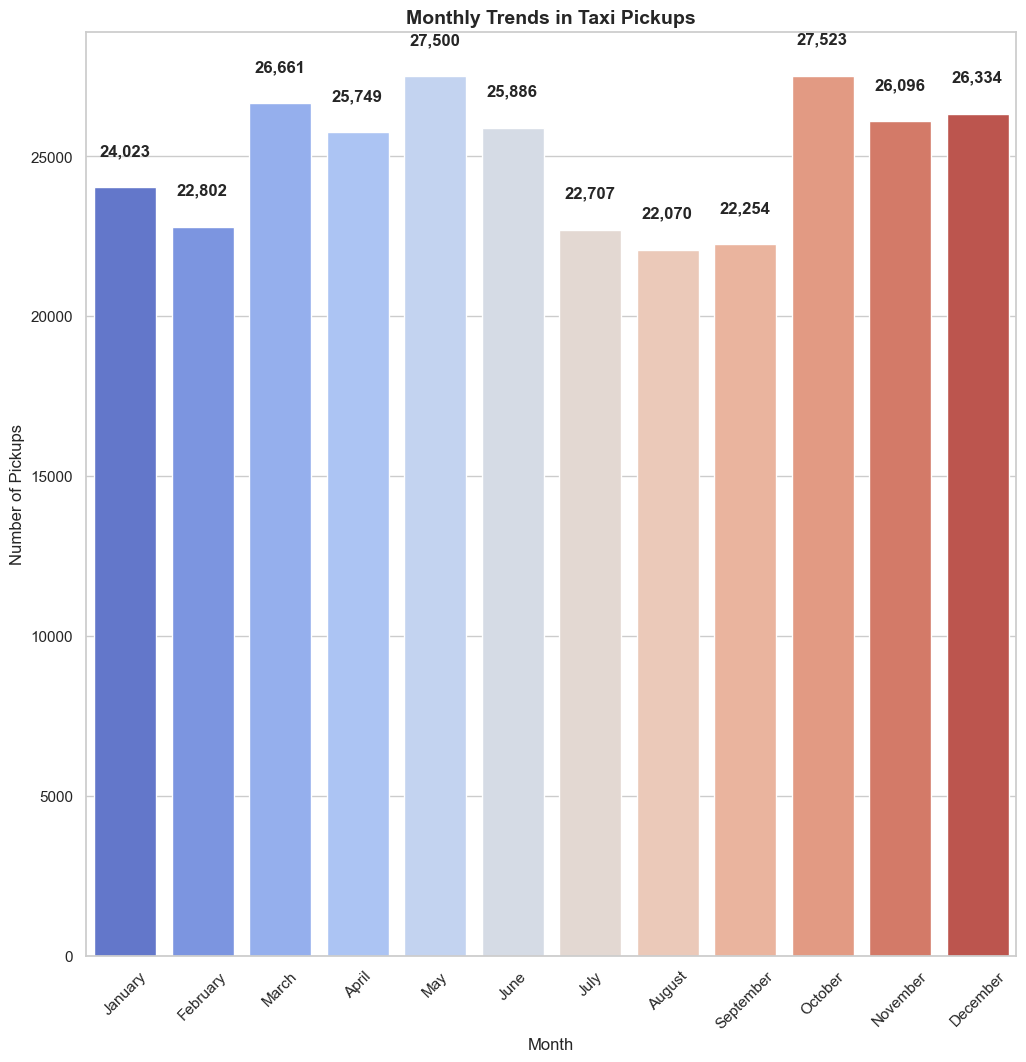

In [232]:
# Show the monthly trends in pickups

taxi_data["tpep_pickup_datetime"] = pd.to_datetime(taxi_data["tpep_pickup_datetime"], errors="coerce")


# Extract the month from the pickup datetime
taxi_data["pickup_month"] = taxi_data["tpep_pickup_datetime"].dt.month

# Map month numbers to names
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
taxi_data["pickup_month"] = taxi_data["pickup_month"].map(lambda x: month_names[x - 1])

# Count the number of pickups per month
monthly_trend = taxi_data["pickup_month"].value_counts().reindex(month_names)  # Ensure correct order

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create a colorful bar chart
plt.figure(figsize=(12,12))
colors = sns.color_palette("coolwarm", len(monthly_trend))

ax = sns.barplot(x=monthly_trend.index, y=monthly_trend.values, palette=colors)

# Add labels on top of each bar
for i, value in enumerate(monthly_trend.values):
    ax.text(i, value + 1000, f"{value:,}", ha="center", fontsize=12, fontweight="bold")  # Adjust "+1000" for spacing

# Labels and title
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Pickups", fontsize=12)
plt.title("Monthly Trends in Taxi Pickups", fontsize=14, fontweight="bold")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

Financial Analysis - Zero and Negative Values
               Zero Values  Negative Values
fare_amount              0                0
tip_amount           68840                0
total_amount            11                0
trip_distance         5869                0


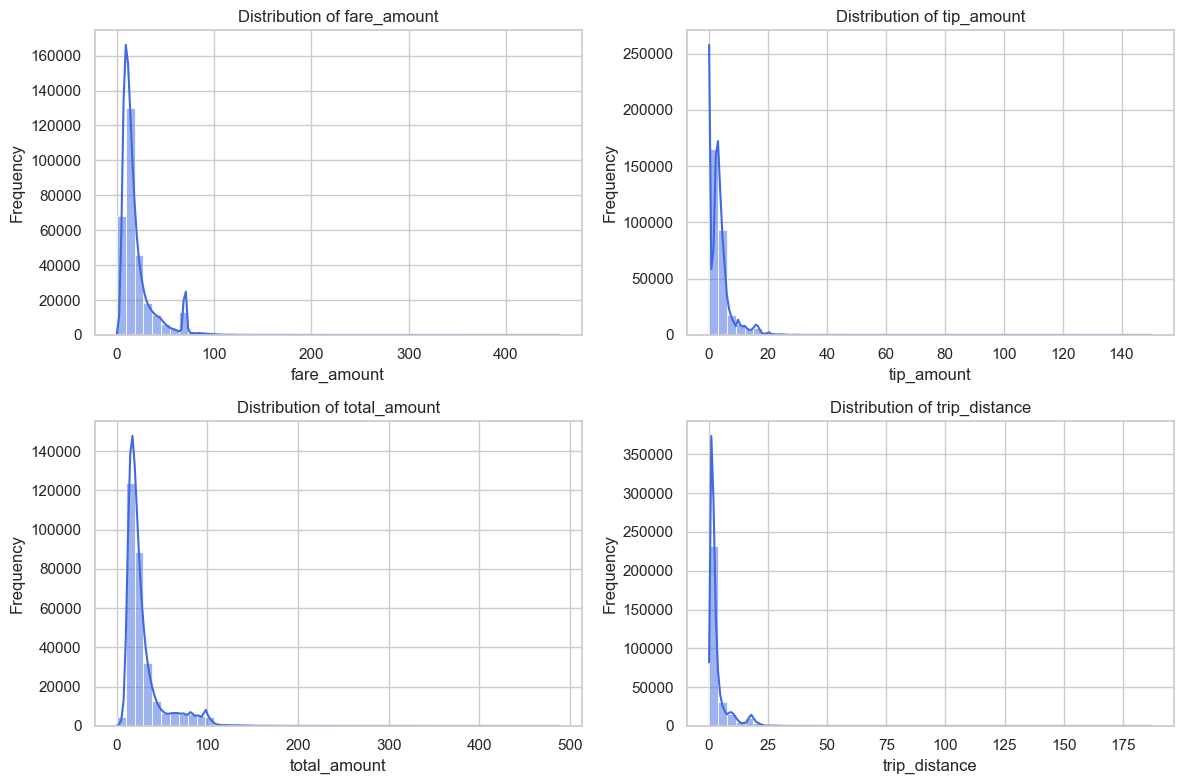

In [254]:
# Analyse the above parameters
# Financial parameters to analyze
financial_columns = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

# Check for zero and negative values
zero_counts = (taxi_data[financial_columns] == 0).sum()
negative_counts = (taxi_data[financial_columns] < 0).sum()

# Combine results into a DataFrame
analysis_df = pd.DataFrame({"Zero Values": zero_counts, "Negative Values": negative_counts})

# Print the summary
print("Financial Analysis - Zero and Negative Values")
print(analysis_df)

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Plot histograms for financial parameters
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for idx, col in enumerate(financial_columns):
    ax = axes[idx // 2, idx % 2]  # Subplot positioning
    sns.histplot(taxi_data[col], bins=50, kde=True, ax=ax, color="royalblue")
    ax.set_title(f"Distribution of {col}", fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

# Adjust layout for clarity
plt.tight_layout()
plt.show()


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [236]:
# Create a df with non zero entries for the selected parameters.
filter_columns = ["fare_amount", "total_amount", "trip_distance"]

# Count zero values before filtering
zero_counts_before = (taxi_data[filter_columns] == 0).sum()
print("Zero Values Before Filtering ")
print(zero_counts_before)

# Filter out rows where fare_amount or total_amount is zero
filtered_taxi_data = taxi_data[
    (taxi_data["fare_amount"] > 0) & 
    (taxi_data["total_amount"] > 0)
]

# Keep zero trip_distance if fare > 0 (valid short rides)
filtered_taxi_data = filtered_taxi_data[
    (filtered_taxi_data["trip_distance"] > 0) | 
    (filtered_taxi_data["fare_amount"] > 0)
]

# Count zero values after filtering
zero_counts_after = (filtered_taxi_data[filter_columns] == 0).sum()
print("\n Zero Values After Filtering")
print(zero_counts_after)

# Print summary
original_count = taxi_data.shape[0]
filtered_count = filtered_taxi_data.shape[0]
print("\n Summary of Data Cleaning ")
print(f"Original number of trips: {original_count:,}")
print(f"Number of trips after filtering: {filtered_count:,}")
print(f"Total trips removed: {original_count - filtered_count:,}")


Zero Values Before Filtering 
fare_amount         0
total_amount       11
trip_distance    5869
dtype: int64

 Zero Values After Filtering
fare_amount         0
total_amount        0
trip_distance    5869
dtype: int64

 Summary of Data Cleaning 
Original number of trips: 299,605
Number of trips after filtering: 299,591
Total trips removed: 14


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [238]:
# Group data by month and analyse monthly revenue
filtered_taxi_data


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1              2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2              2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3              2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
...          ...                  ...                   ...              ...   
299660         2  2023-09-30 23:46:50   2023-09-30 23:59:34              1.0   
299661         1  2023-09-30 23:23:20   2023-09-30 23:37:54              1.0   
299662         1  2023-09-30 23:45:31   2023-10-01 00:19:15              1.0   
299663         1  2023-09-30 23:15:39   2023-09-30 23:25:12              3.0   
299664         2  2023-09-30 23:11:16   2023-09-30 23:27:54              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                7.74         1.0           138           256             2   
1                1.24         1.0           161           237             1   
2                1.44         1.0           237           141             2   
3                0.54         1.0           143           142             2   
4               19.24         1.0            66           107             1   
...               ...         ...           ...           ...           ...   
299660           1.91         1.0            79           231             1   
299661           2.50         1.0           249            48             1   
299662           3.90         1.0           186           263             1   
299663           1.20         1.0           114            79             1   
299664           1.76         1.0           249           234             2   

        fare_amount  ...  mta_tax  tip_amount  tolls_amount  \
0             32.40  ...      0.5        0.00           0.0   
1              7.90  ...      0.5        2.58           0.0   
2             11.40  ...      0.5        0.00           0.0   
3              6.50  ...      0.5        0.00           0.0   
4             25.64  ...      0.5        5.93           0.0   
...             ...  ...      ...         ...           ...   
299660        12.80  ...      0.5        3.56           0.0   
299661        15.60  ...      0.5        2.50           0.0   
299662        30.30  ...      0.5        5.00           0.0   
299663        10.00  ...      0.5        0.00           0.0   
299664        15.60  ...      0.5        0.00           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
0                         1.0         41.15                   0.0   
1                         1.0         15.48                   2.5   
2                         1.0         16.40                   2.5   
3                         1.0         11.50                   2.5   
4                         1.0         35.57                   2.5   
...                       ...           ...                   ...   
299660                    1.0         21.36                   2.5   
299661                    1.0         23.10                   2.5   
299662                    1.0         40.30                   2.5   
299663                    1.0         15.00                   2.5   
299664                    1.0         20.60                   2.5   

        airport_fee  pickup_hour  pickup_day pickup_month  
0              1.25            0      Sunday      January  
1              0.00            0      Sunday      January  
2              0.00            0      Sunday      January  
3              0.00            0      Sunday      January  
4              0.00            0      Sunday      January  
...             ...          ...         ...          ...  
299660         0.00           23    Saturday    September  
299661         0.00           23

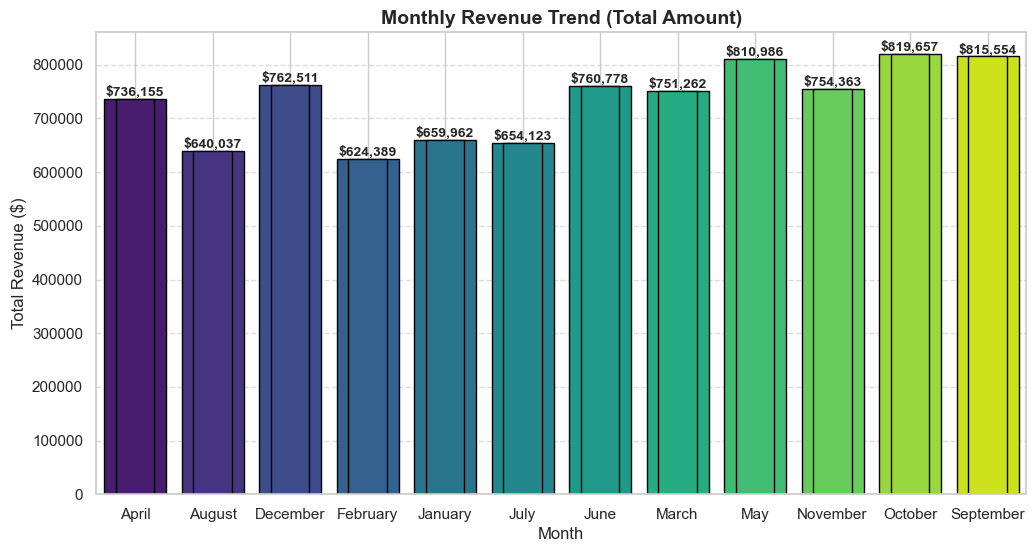

In [255]:
monthly_revenue = filtered_taxi_data.groupby("pickup_month")["total_amount"].sum()

# Create a colorful bar chart
colors = sns.color_palette("viridis", len(monthly_revenue))  # Generate vibrant colors

plt.figure(figsize=(12, 6))
bars = plt.bar(monthly_revenue.index, monthly_revenue.values, color=colors, edgecolor="black")
monthly_revenue.plot(kind="bar", color=colors, edgecolor="black")

# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"${yval:,.0f}", ha='center', va='bottom', fontsize=10, fontweight='bold')


# Chart Formatting
plt.title("Monthly Revenue Trend (Total Amount)", fontsize=14, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue ($)", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

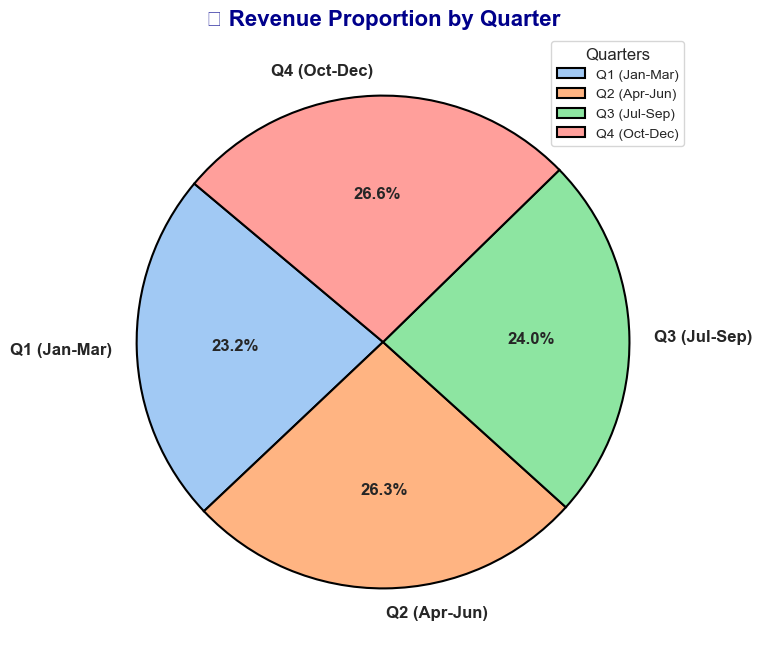

In [242]:
# Calculate proportion of each quarter
# Extract the quarter from the datetime
filtered_taxi_data["quarter"] = filtered_taxi_data["tpep_pickup_datetime"].dt.quarter

# Group by quarter and sum up total revenue
quarterly_revenue = filtered_taxi_data.groupby("quarter")["total_amount"].sum()

# Define labels and colors
labels = ["Q1 (Jan-Mar)", "Q2 (Apr-Jun)", "Q3 (Jul-Sep)", "Q4 (Oct-Dec)"]
colors = sns.color_palette("pastel", len(quarterly_revenue))  # Soft pastel colors

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(quarterly_revenue, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}, textprops={'fontsize': 12, 'fontweight': 'bold'})

# Chart Formatting
plt.title("💰 Revenue Proportion by Quarter", fontsize=16, fontweight="bold", color="darkblue")
plt.legend(title="Quarters", fontsize=10, loc="best")

# Show the plot
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [262]:
filtered_taxi_data = filtered_taxi_data[filtered_taxi_data["fare_amount"] < 1000]

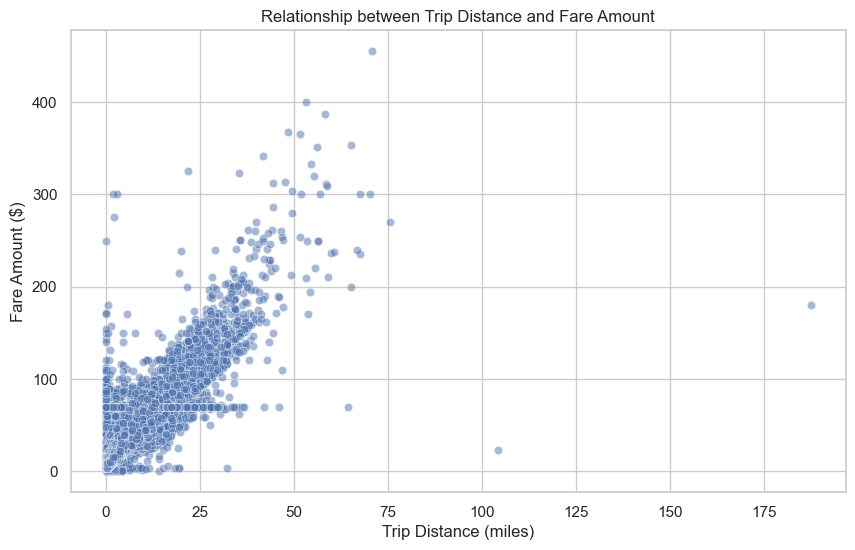

Correlation between trip_distance and fare_amount: 0.9427


In [264]:
# Show how trip fare is affected by distance
# Filter out trips where trip_distance is 0
df = filtered_taxi_data[filtered_taxi_data["trip_distance"] > 0]

# Scatter plot to visualize relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["trip_distance"], y=df["fare_amount"], alpha=0.5)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("Relationship between Trip Distance and Fare Amount")
plt.grid(True)
plt.show()

# Calculate correlation
correlation = df["trip_distance"].corr(df["fare_amount"])
print(f"Correlation between trip_distance and fare_amount: {correlation:.4f}")


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation between trip_duration and fare_amount: 0.27


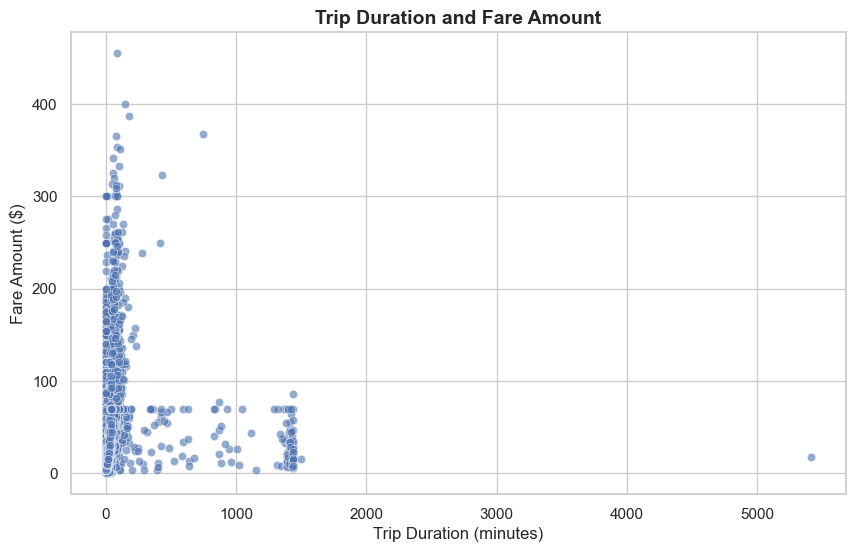

In [272]:
# Show relationship between fare and trip duration

# Show relationship between fare and trip duration
# Calculate the trip duration in minutes
filtered_taxi_data['tpep_pickup_datetime'] = pd.to_datetime(filtered_taxi_data['tpep_pickup_datetime'])
filtered_taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(filtered_taxi_data['tpep_dropoff_datetime'])
filtered_taxi_data['trip_duration'] = (filtered_taxi_data['tpep_dropoff_datetime'] - filtered_taxi_data['tpep_pickup_datetime']).dt.total_seconds() /60 # Convert to minutes

# Filter out rows with zero or negative duration
filtered_df = filtered_taxi_data[filtered_taxi_data['trip_duration'] > 0]

# Calculate the correlation coefficient between trip_duration and fare_amount
correlation = filtered_df['trip_duration'].corr(filtered_df['fare_amount'])
print(f"Correlation between trip_duration and fare_amount: {correlation:.2f}")

# Plot the scatter plot between fare amount and trip duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_df['trip_duration'], y=filtered_df['fare_amount'],alpha=0.6)

# Add labels and title
plt.xlabel("Trip Duration (minutes)", fontsize=12)
plt.ylabel("Fare Amount ($)", fontsize=12)
plt.title("Trip Duration and Fare Amount", fontsize=14, fontweight='bold')
# Show the plot
plt.show()


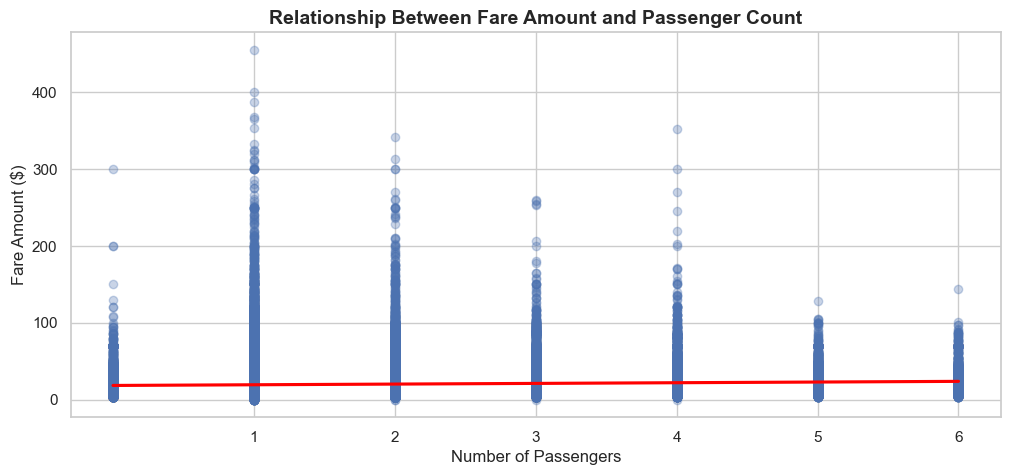

In [278]:
# Show relationship between fare and number of passengers
filtered_taxi_data = filtered_taxi_data[filtered_taxi_data["fare_amount"] > 0]

# Scatter Plot: Passenger Count vs Fare Amount
plt.figure(figsize=(12, 5))
sns.regplot(x=filtered_taxi_data["passenger_count"], y=filtered_taxi_data["fare_amount"], 
            scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})
plt.title("Relationship Between Fare Amount and Passenger Count", fontsize=14, fontweight="bold")
plt.xlabel("Number of Passengers", fontsize=12)
plt.ylabel("Fare Amount ($)", fontsize=12)
plt.xticks(range(1, 7))  # Typical taxi passenger limits
plt.grid(True)


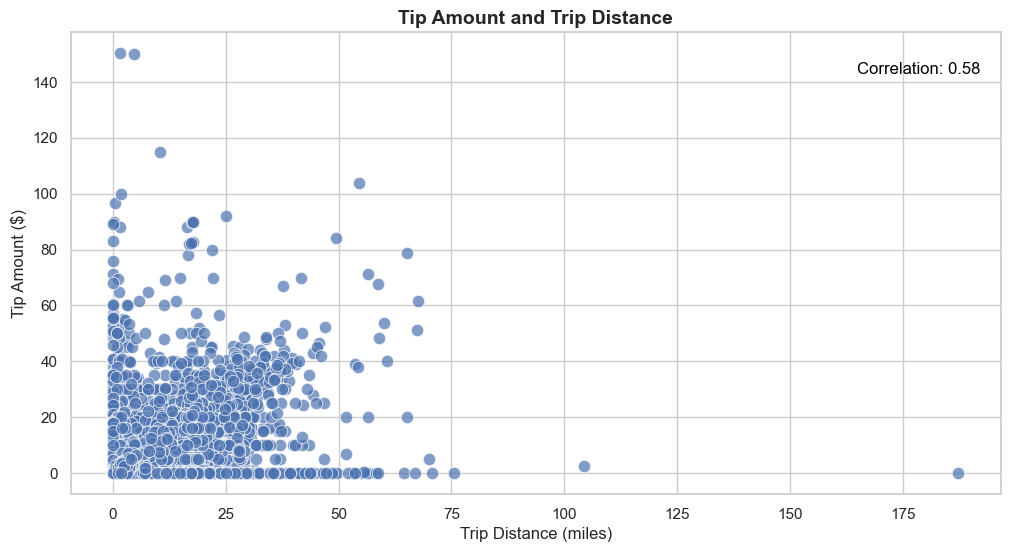

In [284]:
# Show relationship between tip and trip distance
plt.figure(figsize=(12, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=filtered_taxi_data,s=80, alpha=0.7)

# Add labels and title
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Tip Amount ($)', fontsize=12)
plt.title('Tip Amount and Trip Distance', fontsize=14, fontweight='bold')

# Display correlation value
correlation = filtered_taxi_data['trip_distance'].corr(filtered_taxi_data['tip_amount'])
plt.figtext(0.78, 0.81, f'Correlation: {correlation:.2f}', fontsize=12, color='black')

plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

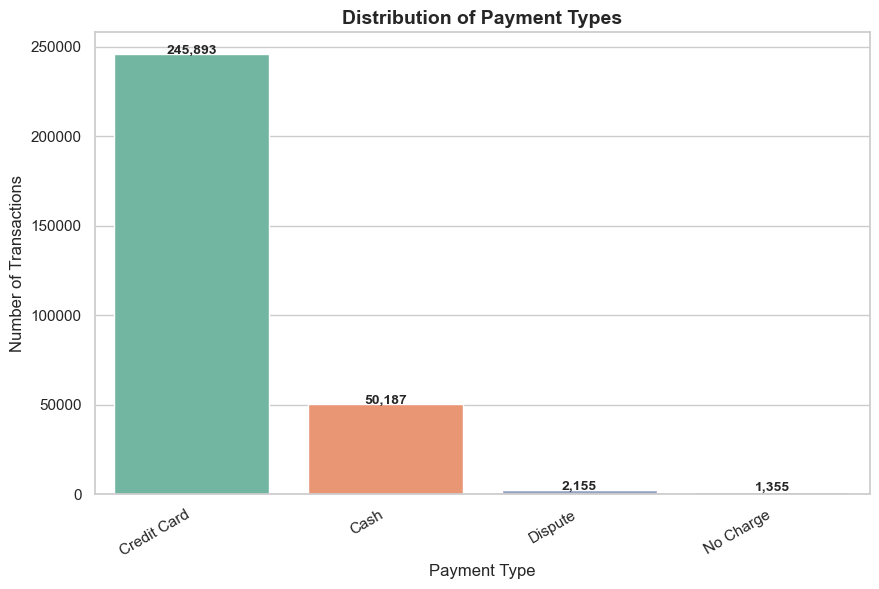

In [286]:
# Analyse the distribution of different payment types (payment_type).
payment_counts = filtered_taxi_data["payment_type"].value_counts()

# Define labels (assuming common NYC Taxi payment types)
payment_labels = {
    1: "Credit Card", 
    2: "Cash", 
    3: "No Charge", 
    4: "Dispute", 
    5: "Unknown", 
    6: "Voided Trip"
}

# Map labels to numbers
payment_counts.index = payment_counts.index.map(payment_labels)

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="Set2")

# Formatting
plt.title("Distribution of Payment Types", fontsize=14, fontweight="bold")
plt.xlabel("Payment Type", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks(rotation=30, ha="right")  # Rotate labels for readability

# Show values on bars
for i, count in enumerate(payment_counts.values):
    plt.text(i, count + 500, f"{count:,}", ha="center", fontsize=10, fontweight="bold")

plt.show()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [282]:
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file("C:\\jitsa\\NYC_Project\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\taxi_zones\\taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

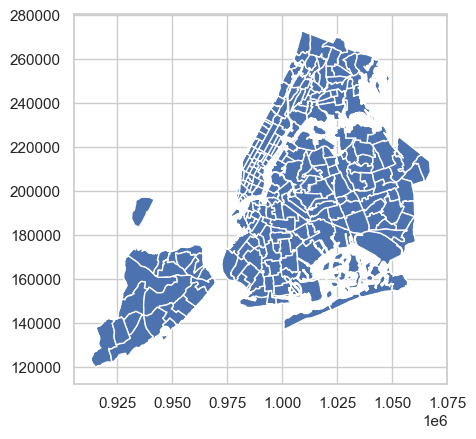

In [288]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [291]:
# Merge zones and trip records using locationID and PULocationID
taxi_zones_merged = filtered_taxi_data.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")

# Check the merged DataFrame
taxi_zones_merged.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
4          19.24         1.0            66           107             1   

   fare_amount  ...  pickup_month  quarter  trip_duration  OBJECTID  \
0        32.40  ...       January        1      15.950000     138.0   
1         7.90  ...       January        1       5.083333     161.0   
2        11.40  ...       January        1      10.550000     237.0   
3         6.50  ...       January        1       5.416667     143.0   
4        25.64  ...       January        1      18.000000      66.0   

   Shape_Leng  Shape_Area                   zone  LocationID    borough  \
0    0.107467    0.000537      LaGuardia Airport       138.0     Queens   
1    0.035804    0.000072         Midtown Center       161.0  Manhattan   
2    0.042213    0.000096  Upper East Side South       237.0  Manhattan   
3    0.054180    0.000151    Lincoln Square West       143.0  Manhattan   
4    0.054633    0.000108     DUMBO/Vinegar Hill        66.0   Brooklyn   

                                            geometry  
0  MULTIPOLYGON (((1019904.219 225677.983, 102031...  
1  POLYGON ((991081.026 214453.698, 990952.644 21...  
2  POLYGON ((993633.442 216961.016, 993507.232 21...  
3  POLYGON ((989338.1 223572.253, 989368.225 2235...  
4  POLYGON ((990055.507 196472.349, 990004.46 196...  

[5 rows x 30 columns]

In [295]:
taxi_zones_merged.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
airport_fee                 0
pickup_hour                 0
pickup_day                  0
pickup_month                0
quarter                     0
trip_duration               0
OBJECTID                 3007
Shape_Leng               3007
Shape_Area               3007
zone                     3007
LocationID               3007
borough                  3007
geometry                 3007
dtype: int64

In [307]:
taxi_zones_merged = taxi_zones_merged.dropna(subset=["zone"])
taxi_zones_merged.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
pickup_hour              0
pickup_day               0
pickup_month             0
quarter                  0
trip_duration            0
OBJECTID                 0
Shape_Leng               0
Shape_Area               0
zone                     0
LocationID               0
borough                  0
geometry                 0
dtype: int64

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [313]:
# Group data by location and calculate the number of trips
trips_per_location = taxi_zones_merged.groupby("PULocationID").size().reset_index(name="num_trips")

# Merge with merged taxi zones to get zone names
trips_per_location = trips_per_location.merge(
    taxi_zones_merged[["PULocationID", "zone"]].drop_duplicates(),
    on="PULocationID",
    how="left"
)

# Sort by most popular locations
trips_per_location = trips_per_location.sort_values(by="num_trips", ascending=False)

# Display the top 10 locations with zone names
trips_per_location[['PULocationID','zone','num_trips']].head(10)


PULocationID                          zone  num_trips
116           132                   JFK Airport      15286
214           237         Upper East Side South      13940
144           161                Midtown Center      13812
213           236         Upper East Side North      12575
145           162                  Midtown East      10655
122           138             LaGuardia Airport      10114
165           186  Penn Station/Madison Sq West      10072
207           230     Times Sq/Theatre District       9868
126           142           Lincoln Square East       9810
153           170                   Murray Hill       8778

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [315]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(trips_per_location, left_on="LocationID", right_on="PULocationID", how="left")

# Fill NaN values (for locations with no trips) with 0
zones["num_trips"] = zones["num_trips"].fillna(0)
zones.head()


OBJECTID  Shape_Leng  Shape_Area                   zone_x  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  num_trips                   zone_y  
0           1.0       42.0           Newark Airport  
1           NaN        0.0                      NaN  
2           3.0       10.0  Allerton/Pelham Gardens  
3           4.0      356.0            Alphabet City  
4           5.0        2.0            Arden Heights

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

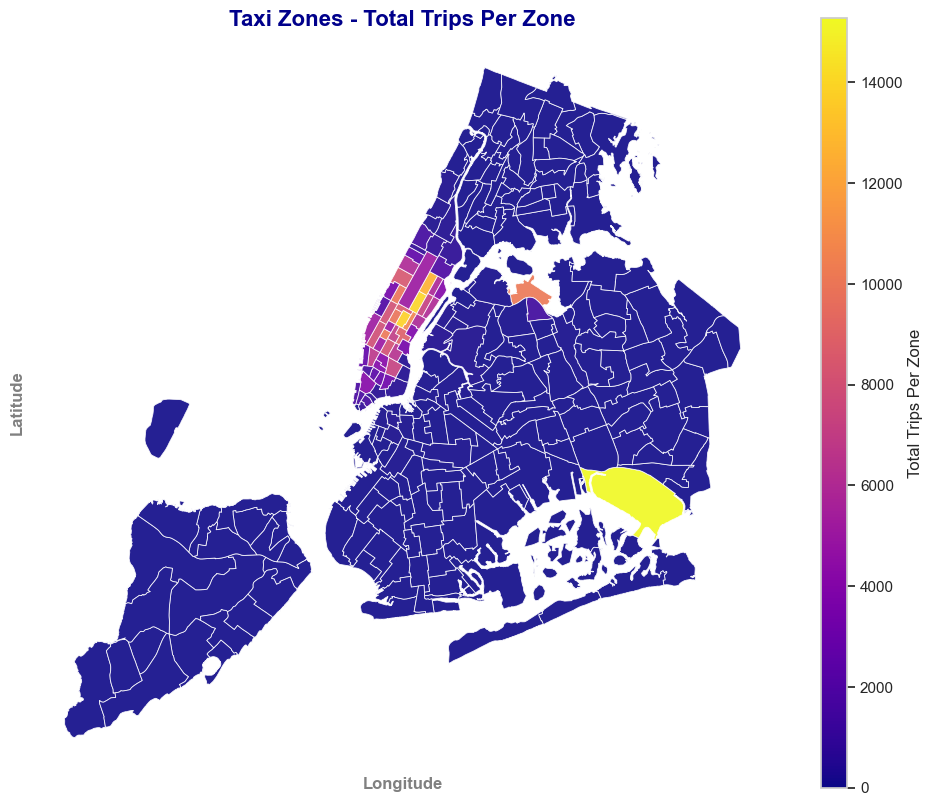

In [325]:
# Plot the map and display it

# Define figure and axis

fig, ax = plt.subplots(1, 1, figsize=(12, 20))

# Choose a visually appealing colormap
cmap = "plasma"  # Options: 'coolwarm', 'plasma', 'magma', 'cividis', 'inferno'

# Plot taxi zones with improved colors and white outlines
zones.sort_values(by="num_trips", ascending=False).plot(
    column="num_trips", 
    cmap=cmap, 
    edgecolor="white",  # White outline for better contrast
    linewidth=0.6, 
    legend=True, 
    ax=ax, 
    alpha=0.9,  # Slight transparency to improve visibility
    legend_kwds={
        'label': "Total Trips Per Zone", 
        'orientation': "vertical",
        'shrink': 0.5,  # Adjust legend size
        'aspect': 30  # Make legend taller for better readability
    }
)

# Title and labels
plt.title("Taxi Zones - Total Trips Per Zone", fontsize=16, fontweight='bold', color="darkblue")
ax.set_xlabel("Longitude", fontsize=12, fontweight="bold", color="gray")
ax.set_ylabel("Latitude", fontsize=12, fontweight="bold", color="gray")

# Remove axes for cleaner visualization
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Show plot
plt.show()

In [337]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted = zones.sort_values(by="num_trips", ascending=False)
zones_sorted[["LocationID", "borough", "zone_x", "num_trips"]].head(10)


LocationID    borough                        zone_x  num_trips
131         132     Queens                   JFK Airport    15286.0
236         237  Manhattan         Upper East Side South    13940.0
160         161  Manhattan                Midtown Center    13812.0
235         236  Manhattan         Upper East Side North    12575.0
161         162  Manhattan                  Midtown East    10655.0
137         138     Queens             LaGuardia Airport    10114.0
185         186  Manhattan  Penn Station/Madison Sq West    10072.0
229         230  Manhattan     Times Sq/Theatre District     9868.0
141         142  Manhattan           Lincoln Square East     9810.0
169         170  Manhattan                   Murray Hill     8778.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

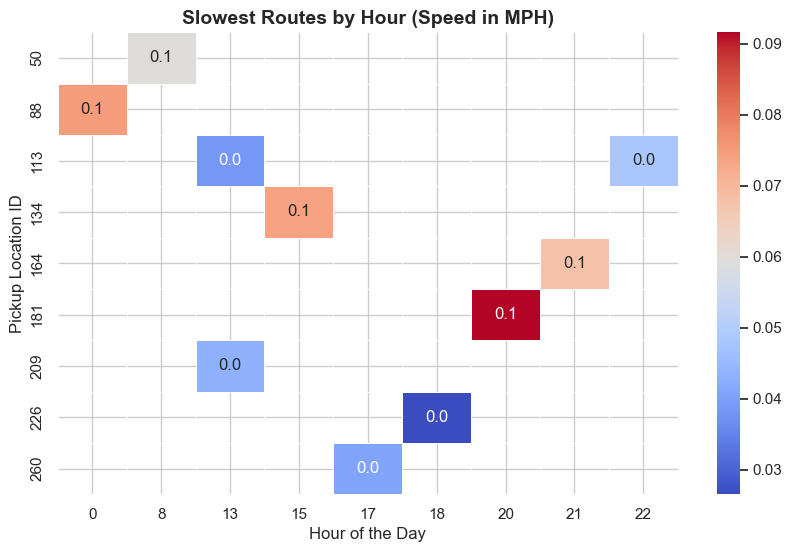

In [343]:

# Ensure datetime conversion
taxi_zones_merged.loc[:, "tpep_pickup_datetime"] = pd.to_datetime(taxi_zones_merged["tpep_pickup_datetime"])
taxi_zones_merged.loc[:, "tpep_dropoff_datetime"] = pd.to_datetime(taxi_zones_merged["tpep_dropoff_datetime"])

# Extract hour from pickup time
taxi_zones_merged.loc[:, "pickup_hour"] = taxi_zones_merged["tpep_pickup_datetime"].dt.hour  

# Calculate trip duration (minutes)
taxi_zones_merged.loc[:, "trip_duration"] = (taxi_zones_merged["tpep_dropoff_datetime"] - taxi_zones_merged["tpep_pickup_datetime"]).dt.total_seconds() / 60  

# Filter out zero/negative trip durations and distances to avoid errors
taxi_zones_merged = taxi_zones_merged[(taxi_zones_merged["trip_duration"] > 0) & (taxi_zones_merged["trip_distance"] > 0)]

# Group by route (Pickup & Dropoff Location) and hour, then calculate average trip duration and distance
route_stats = taxi_zones_merged.groupby(["PULocationID", "DOLocationID", "pickup_hour"]).agg(
    avg_duration=("trip_duration", "mean"),
    avg_distance=("trip_distance", "mean")
).reset_index()

# Calculate speed: distance divided by time (miles per hour)
route_stats.loc[:, "speed_mph"] = (route_stats["avg_distance"] / route_stats["avg_duration"]) * 60  # Convert to mph

# Handle cases where speed is NaN or infinity (division by zero)
route_stats = route_stats.replace([float("inf"), -float("inf")], None).dropna(subset=["speed_mph"])

# Identify slowest routes (lowest speed)
slowest_routes = route_stats.sort_values(by="speed_mph").head(10)  # Adjust number as needed

#  Visualization: Slowest Routes Heatmap
plt.figure(figsize=(10, 6))

# Correct pivot usage
pivot_table = slowest_routes.pivot(index="PULocationID", columns="pickup_hour", values="speed_mph")

sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".001f", linewidths=0.5)

plt.title("Slowest Routes by Hour (Speed in MPH)", fontsize=14, fontweight="bold")
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Pickup Location ID", fontsize=12)

plt.show()


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

 Busiest Hour: 18:00 with 20558 trips


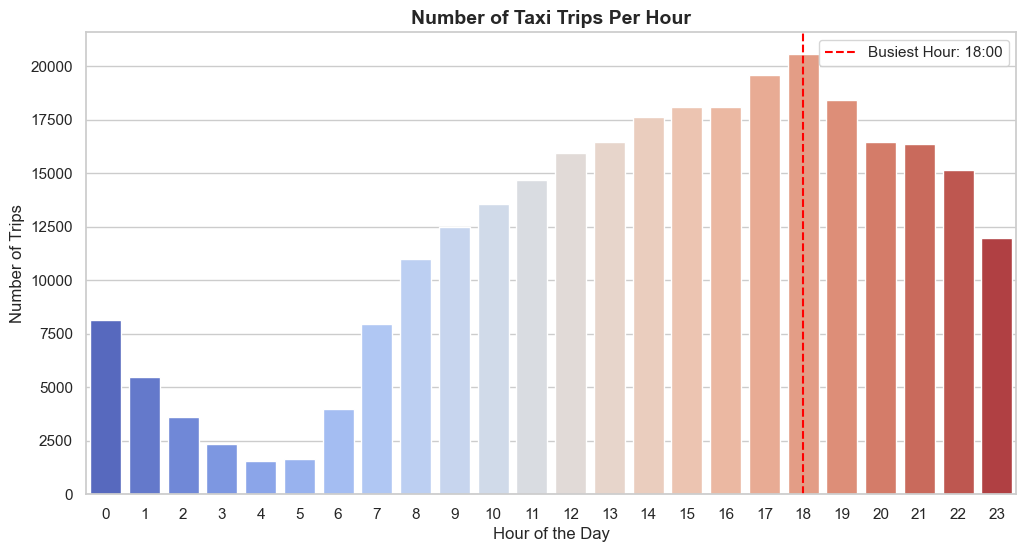

In [349]:
# Visualise the number of trips per hour and find the busiest hour
taxi_zones_merged["tpep_pickup_datetime"] = pd.to_datetime(taxi_zones_merged["tpep_pickup_datetime"])

# Extract pickup hour
taxi_zones_merged["pickup_hour"] = taxi_zones_merged["tpep_pickup_datetime"].dt.hour  

# Count the number of trips per hour
hourly_trips = taxi_zones_merged["pickup_hour"].value_counts().sort_index()

# Find the busiest hour
busiest_hour = hourly_trips.idxmax()
max_trips = hourly_trips.max()
print(f" Busiest Hour: {busiest_hour}:00 with {max_trips} trips")

# Visualization: Number of Trips Per Hour
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_trips.index, y=hourly_trips.values, palette="coolwarm")

plt.title("Number of Taxi Trips Per Hour", fontsize=14, fontweight="bold")
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.xticks(range(24))  # Ensure all 24 hours are displayed

# Highlight busiest hour
plt.axvline(busiest_hour, color="red", linestyle="--", label=f"Busiest Hour: {busiest_hour}:00")
plt.legend()

plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [353]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
taxi_zones_merged["tpep_pickup_datetime"] = pd.to_datetime(taxi_zones_merged["tpep_pickup_datetime"])

# Extract pickup hour
taxi_zones_merged["pickup_hour"] = taxi_zones_merged["tpep_pickup_datetime"].dt.hour  

# Count trips per hour
hourly_trips = taxi_zones_merged["pickup_hour"].value_counts().sort_values(ascending=False)

# Get the top 5 busiest hours
busiest_hours = hourly_trips.head(5)

# Print results
print("Top 5 Busiest Hours and Their Trip Counts:")
print(busiest_hours)

# Define the sampling fraction (adjust based on actual data sampling)
sampling_fraction = 0.0079  

# Ensure datetime conversion
taxi_zones_merged["tpep_pickup_datetime"] = pd.to_datetime(taxi_zones_merged["tpep_pickup_datetime"])

# Extract pickup hour
taxi_zones_merged["pickup_hour"] = taxi_zones_merged["tpep_pickup_datetime"].dt.hour  

# Count trips per hour
hourly_trips = taxi_zones_merged["pickup_hour"].value_counts().sort_values(ascending=False)

# Get the top 5 busiest hours
busiest_hours = hourly_trips.head(5)

# Scale up the number of trips using the sampling fraction
scaled_busiest_hours = busiest_hours / sampling_fraction

# Print results
print("Top 5 Busiest Hours and Their Scaled Trip Counts:")
print(scaled_busiest_hours.astype(int))



Top 5 Busiest Hours and Their Trip Counts:
pickup_hour
18    20558
17    19606
19    18420
15    18076
16    18074
Name: count, dtype: int64
Top 5 Busiest Hours and Their Scaled Trip Counts:
pickup_hour
18    2602278
17    2481772
19    2331645
15    2288101
16    2287848
Name: count, dtype: int32


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

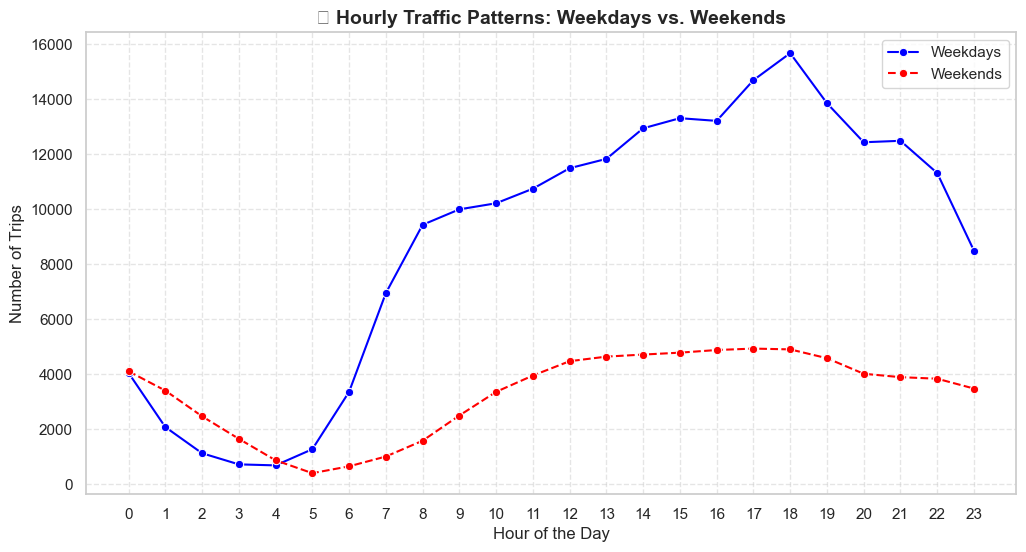

In [355]:
# Compare traffic trends for the week days and weekends
# Ensure datetime conversion
taxi_zones_merged["tpep_pickup_datetime"] = pd.to_datetime(taxi_zones_merged["tpep_pickup_datetime"])

# Extract pickup hour and weekday
taxi_zones_merged["pickup_hour"] = taxi_zones_merged["tpep_pickup_datetime"].dt.hour  
taxi_zones_merged["day_of_week"] = taxi_zones_merged["tpep_pickup_datetime"].dt.weekday  # Monday = 0, Sunday = 6

# Split data into weekday and weekend
weekday_data = taxi_zones_merged[taxi_zones_merged["day_of_week"] < 5]  # Monday to Friday
weekend_data = taxi_zones_merged[taxi_zones_merged["day_of_week"] >= 5]  # Saturday & Sunday

# Count trips per hour for weekdays and weekends
weekday_hourly_trips = weekday_data["pickup_hour"].value_counts().sort_index()
weekend_hourly_trips = weekend_data["pickup_hour"].value_counts().sort_index()

# Visualization
plt.figure(figsize=(12, 6))

# Plot weekday traffic
sns.lineplot(x=weekday_hourly_trips.index, y=weekday_hourly_trips.values, label="Weekdays", marker="o", linestyle="-", color="blue")

# Plot weekend traffic
sns.lineplot(x=weekend_hourly_trips.index, y=weekend_hourly_trips.values, label="Weekends", marker="o", linestyle="--", color="red")

# Labels & title
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.title("Hourly Traffic Patterns: Weekdays vs. Weekends", fontsize=14, fontweight="bold")
plt.xticks(range(0, 24))  # Ensure all 24 hours are shown
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

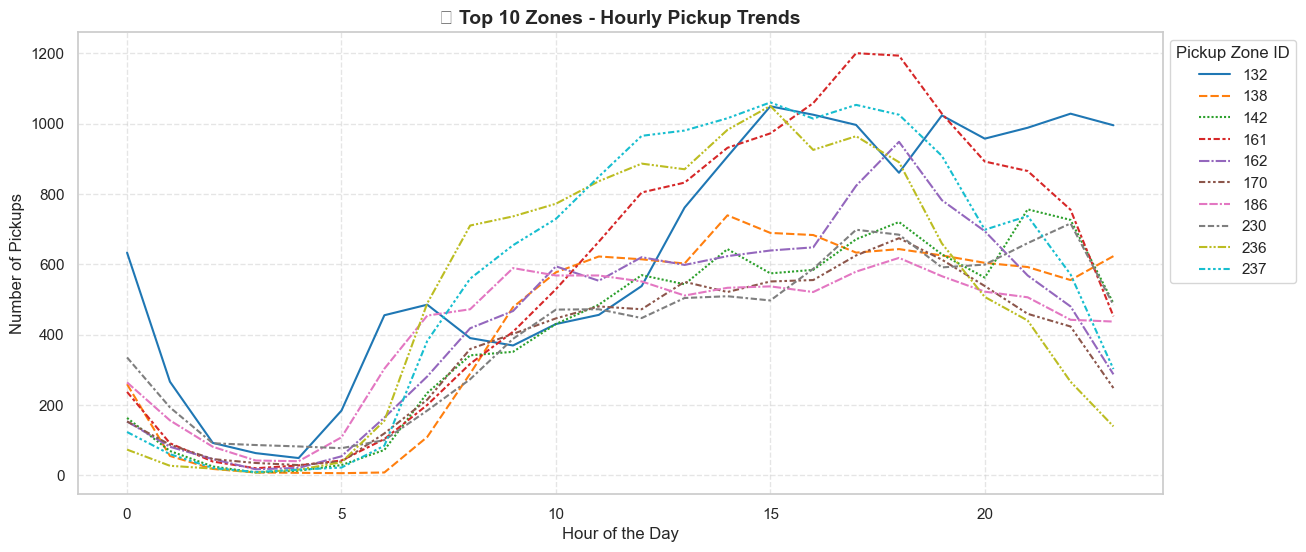

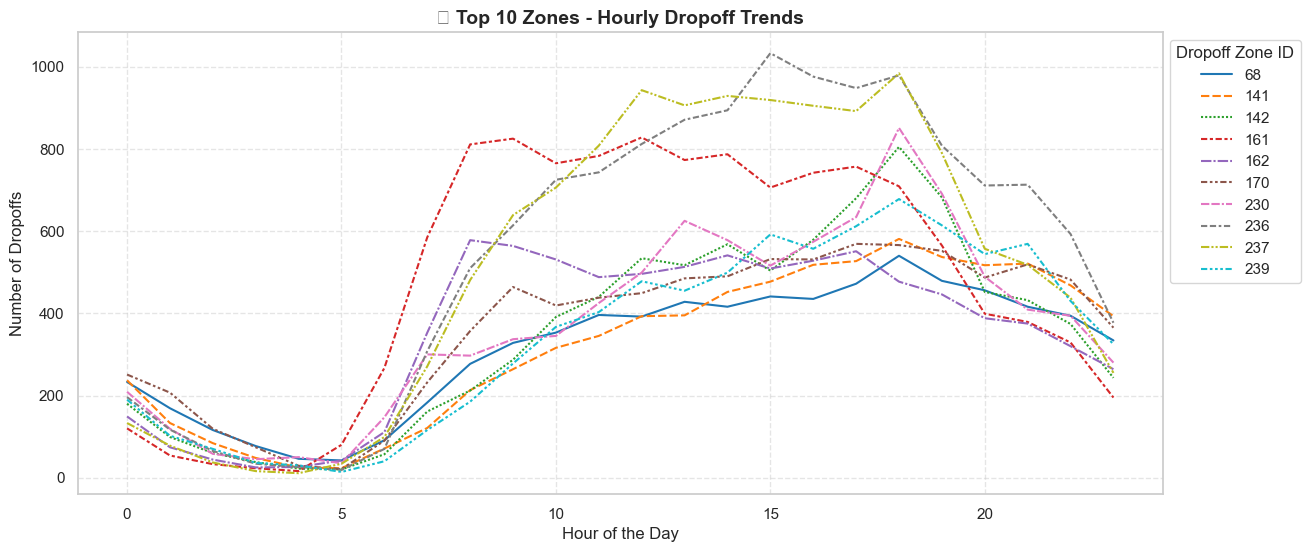

In [357]:
# Find top 10 pickup and dropoff zones
taxi_zones_merged["tpep_pickup_datetime"] = pd.to_datetime(taxi_zones_merged["tpep_pickup_datetime"])
taxi_zones_merged["tpep_dropoff_datetime"] = pd.to_datetime(taxi_zones_merged["tpep_dropoff_datetime"])

# Extract pickup and dropoff hours
taxi_zones_merged["pickup_hour"] = taxi_zones_merged["tpep_pickup_datetime"].dt.hour  
taxi_zones_merged["dropoff_hour"] = taxi_zones_merged["tpep_dropoff_datetime"].dt.hour  

#  **Find Top 10 Pickup Zones**
top_pickup_zones = taxi_zones_merged["PULocationID"].value_counts().head(10).index
top_pickup_df = taxi_zones_merged[taxi_zones_merged["PULocationID"].isin(top_pickup_zones)]

# **Find Top 10 Dropoff Zones**
top_dropoff_zones = taxi_zones_merged["DOLocationID"].value_counts().head(10).index
top_dropoff_df = taxi_zones_merged[taxi_zones_merged["DOLocationID"].isin(top_dropoff_zones)]

#  **Visualization: Pickup Trends**
plt.figure(figsize=(14, 6))
sns.lineplot(data=top_pickup_df.groupby(["pickup_hour", "PULocationID"]).size().unstack(), palette="tab10")
plt.title("Top 10 Zones - Hourly Pickup Trends", fontsize=14, fontweight="bold")
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Pickups", fontsize=12)
plt.legend(title="Pickup Zone ID", bbox_to_anchor=(1, 1))
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# **Visualization: Dropoff Trends**
plt.figure(figsize=(14, 6))
sns.lineplot(data=top_dropoff_df.groupby(["dropoff_hour", "DOLocationID"]).size().unstack(), palette="tab10")
plt.title("Top 10 Zones - Hourly Dropoff Trends", fontsize=14, fontweight="bold")
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Dropoffs", fontsize=12)
plt.legend(title="Dropoff Zone ID", bbox_to_anchor=(1, 1))
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.


 Top 10 Pickup/Dropoff Ratio 
      Pickup_Count  Dropoff_Count  Pickup/Dropoff Ratio
70         1318.0            148              8.845638
132       14998.0           3271              4.583741
138       10038.0           3739              2.683957
186        9968.0           6550              1.521600
249        6558.0           4785              1.370247
43         4971.0           3632              1.368291
114        3823.0           2848              1.341874
162       10559.0           8393              1.257922
100        4759.0           4006              1.187672
161       13660.0          11531              1.184530


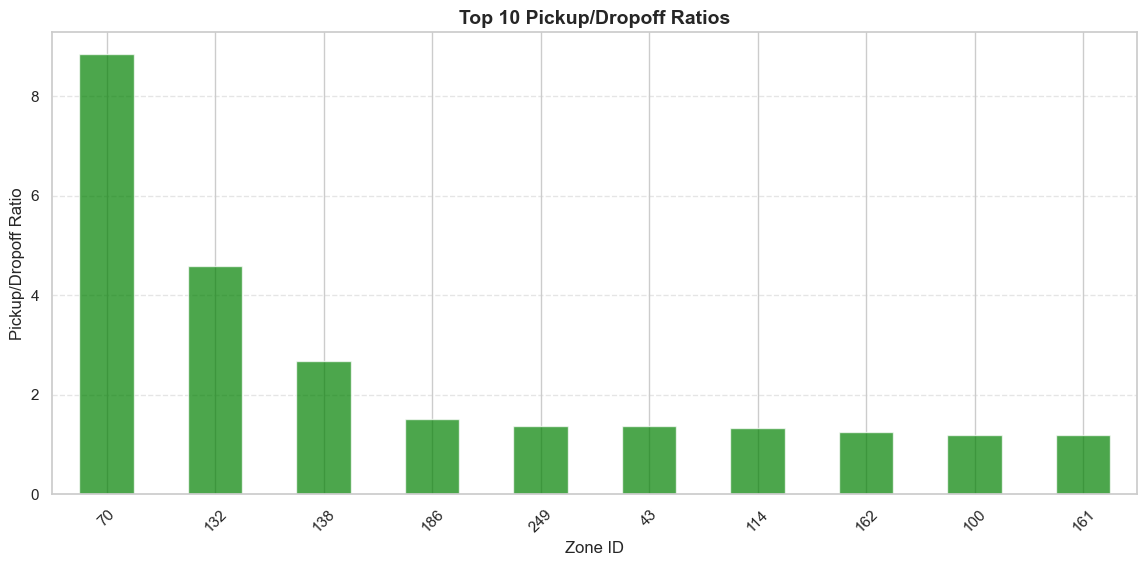


 Bottom 10 Pickup/Dropoff Ratio
       Pickup_Count  Dropoff_Count  Pickup/Dropoff Ratio
265           0.0           1104                   0.0
57            0.0              1                   0.0
58            0.0             10                   0.0
59            0.0              1                   0.0
99            0.0              1                   0.0
109           0.0              3                   0.0
111           0.0              3                   0.0
264           0.0            650                   0.0
156           0.0              2                   0.0
176           0.0              1                   0.0


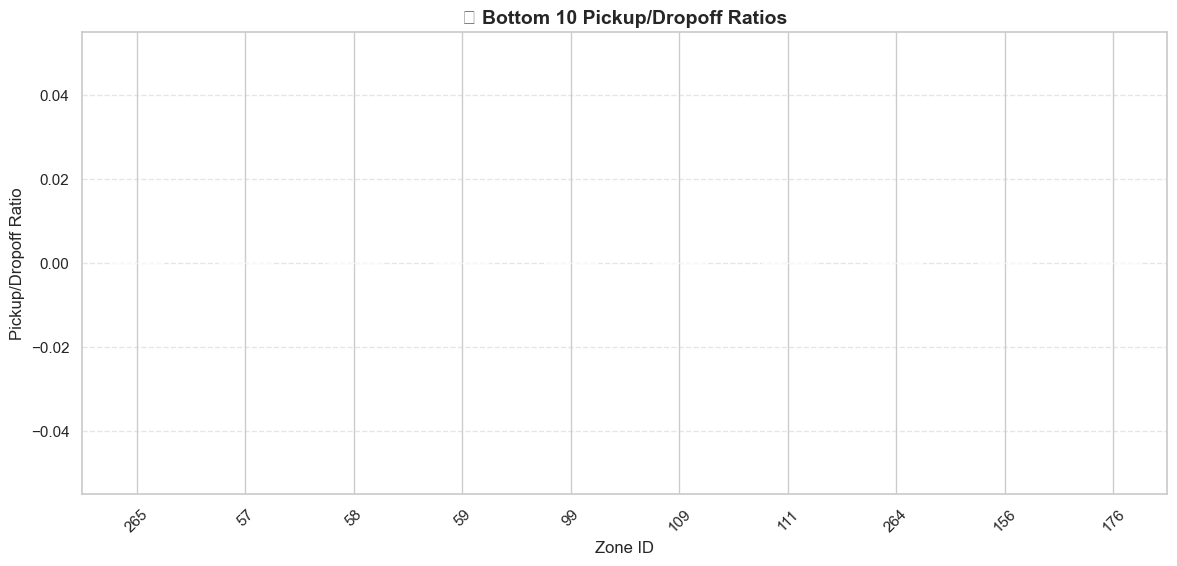

In [369]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_counts = taxi_zones_merged["PULocationID"].value_counts()
dropoff_counts = taxi_zones_merged["DOLocationID"].value_counts()

# Create a DataFrame with pickup/dropoff ratios
pickup_dropoff_ratio = pd.DataFrame({
    "Pickup_Count": pickup_counts,
    "Dropoff_Count": dropoff_counts
}).fillna(0)  # Fill missing values with 0

# Calculate the ratio
pickup_dropoff_ratio["Pickup/Dropoff Ratio"] = pickup_dropoff_ratio["Pickup_Count"] / (pickup_dropoff_ratio["Dropoff_Count"] + 1)  # Avoid division by zero

# Sort to get top 10 and bottom 10 zones
top_10_ratio = pickup_dropoff_ratio.sort_values(by="Pickup/Dropoff Ratio", ascending=False).head(10)
bottom_10_ratio = pickup_dropoff_ratio.sort_values(by="Pickup/Dropoff Ratio", ascending=True).head(10)
print("\n Top 10 Pickup/Dropoff Ratio \n",top_10_ratio)
#  **Visualization: Top 10 Pickup/Dropoff Ratios**
plt.figure(figsize=(14, 6))
top_10_ratio["Pickup/Dropoff Ratio"].plot(kind="bar", color="green", alpha=0.7)
plt.title("Top 10 Pickup/Dropoff Ratios", fontsize=14, fontweight="bold")
plt.xlabel("Zone ID", fontsize=12)
plt.ylabel("Pickup/Dropoff Ratio", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()
print("\n Bottom 10 Pickup/Dropoff Ratio\n ",bottom_10_ratio)
# Visualization: Bottom 10 Pickup/Dropoff Ratios**
plt.figure(figsize=(14, 6))
bottom_10_ratio["Pickup/Dropoff Ratio"].plot(kind="bar", color="red", alpha=0.7)
plt.title("🚖 Bottom 10 Pickup/Dropoff Ratios", fontsize=14, fontweight="bold")
plt.xlabel("Zone ID", fontsize=12)
plt.ylabel("Pickup/Dropoff Ratio", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

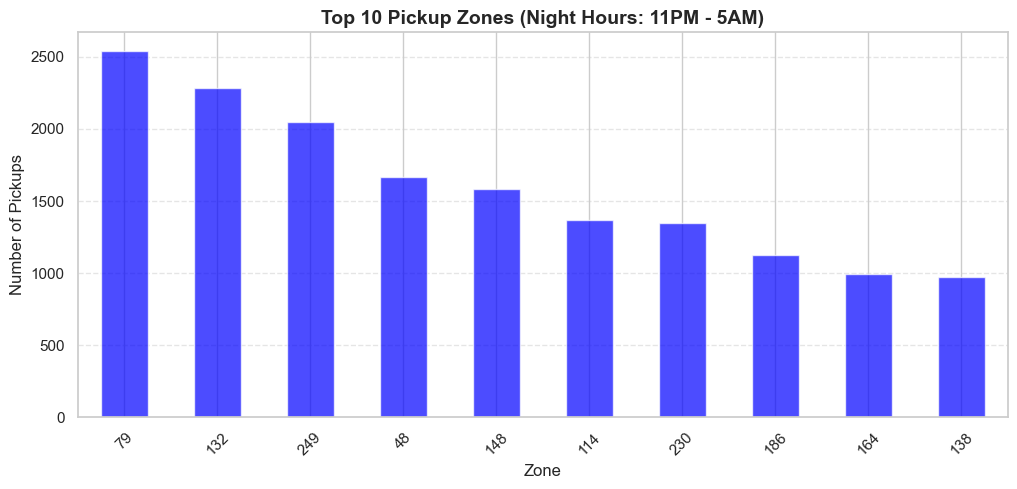

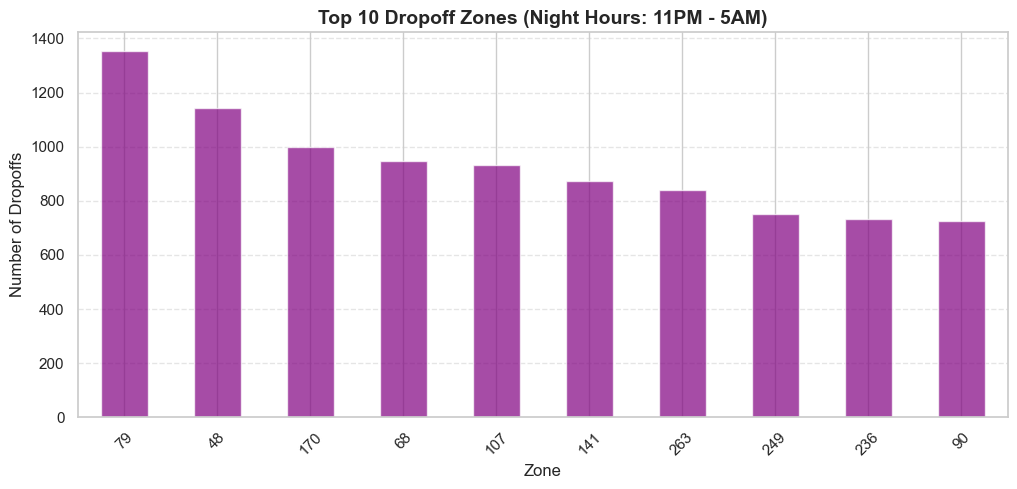

In [379]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Convert pickup time to datetime and extract the hour
taxi_zones_merged["pickup_hour"] = pd.to_datetime(taxi_zones_merged["tpep_pickup_datetime"]).dt.hour

# Filter data for night hours (11 PM - 5 AM)
night_taxi_data = taxi_zones_merged[(taxi_zones_merged["pickup_hour"] >= 23) | (taxi_zones_merged["pickup_hour"] <= 5)]

# Count pickups and dropoffs by zone
night_pickup_counts = night_taxi_data["PULocationID"].value_counts().head(10)  # Top 10 Pickup Zones
night_dropoff_counts = night_taxi_data["DOLocationID"].value_counts().head(10)  # Top 10 Dropoff Zones

# **Visualization: Top 10 Nighttime Pickup Zones**
plt.figure(figsize=(12, 5))
night_pickup_counts.plot(kind="bar", color="blue", alpha=0.7)
plt.title("Top 10 Pickup Zones (Night Hours: 11PM - 5AM)", fontsize=14, fontweight="bold")
plt.xlabel("Zone", fontsize=12)
plt.ylabel("Number of Pickups", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

# 📊 **Visualization: Top 10 Nighttime Dropoff Zones**
plt.figure(figsize=(12, 5))
night_dropoff_counts.plot(kind="bar", color="purple", alpha=0.7)
plt.title("Top 10 Dropoff Zones (Night Hours: 11PM - 5AM)", fontsize=14, fontweight="bold")
plt.xlabel("Zone ID", fontsize=12)
plt.ylabel("Number of Dropoffs", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

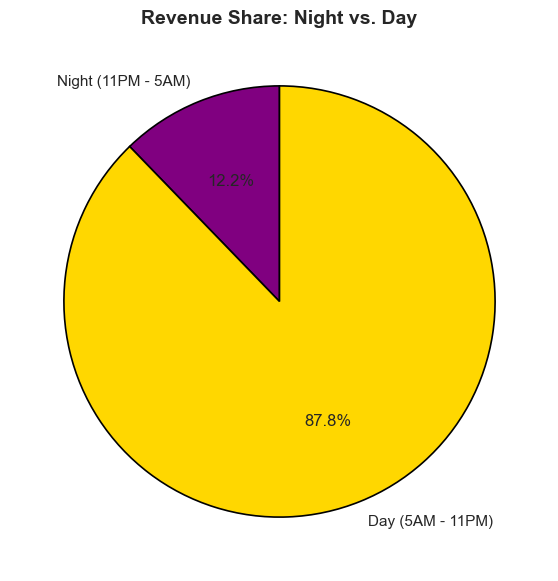

In [373]:
# Filter for night hours (11 PM to 5 AM)
# Convert pickup time to datetime and extract the hour
taxi_zones_merged["pickup_hour"] = pd.to_datetime(taxi_zones_merged["tpep_pickup_datetime"]).dt.hour

# Define night and day time ranges
night_hours = (taxi_zones_merged["pickup_hour"] >= 23) | (taxi_zones_merged["pickup_hour"] <= 5)
day_hours = (taxi_zones_merged["pickup_hour"] > 5) & (taxi_zones_merged["pickup_hour"] < 23)

# Calculate total revenue for night and day
night_revenue = taxi_zones_merged.loc[night_hours, "total_amount"].sum()
day_revenue = taxi_zones_merged.loc[day_hours, "total_amount"].sum()

# **Visualization: Revenue Share (Night vs. Day)**
labels = ["Night (11PM - 5AM)", "Day (5AM - 11PM)"]
revenues = [night_revenue, day_revenue]
colors = ["purple", "gold"]

plt.figure(figsize=(7, 7))
plt.pie(revenues, labels=labels, autopct="%1.1f%%", startangle=90, colors=colors, 
        wedgeprops={"edgecolor": "black", "linewidth": 1.2})
plt.title("Revenue Share: Night vs. Day", fontsize=14, fontweight="bold")
plt.show()


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

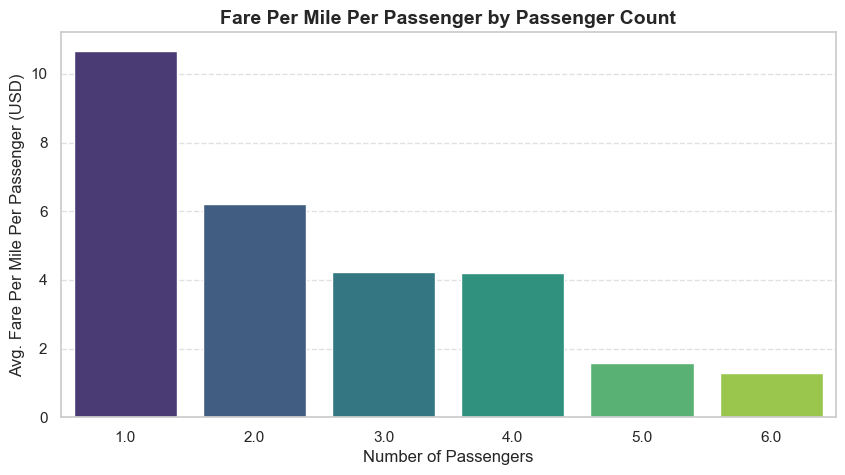

In [375]:
# Analyse the fare per mile per passenger for different passenger counts

# Ensure passenger_count and trip_distance are numeric
taxi_zones_merged["passenger_count"] = pd.to_numeric(taxi_zones_merged["passenger_count"], errors="coerce")
taxi_zones_merged["trip_distance"] = pd.to_numeric(taxi_zones_merged["trip_distance"], errors="coerce")

# Remove trips with zero/negative distance or zero passengers
filtered_data = taxi_zones_merged[(taxi_zones_merged["trip_distance"] > 0) & (taxi_zones_merged["passenger_count"] > 0)]

# Calculate fare per mile
filtered_data["fare_per_mile"] = filtered_data["fare_amount"] / filtered_data["trip_distance"]

# Calculate fare per mile per passenger
filtered_data["fare_per_mile_per_passenger"] = filtered_data["fare_per_mile"] / filtered_data["passenger_count"]

# Group by passenger count and find the average fare per mile per passenger
fare_analysis = filtered_data.groupby("passenger_count")["fare_per_mile_per_passenger"].mean().reset_index()

# **Visualization: Fare Per Mile Per Passenger**
plt.figure(figsize=(10, 5))
sns.barplot(x="passenger_count", y="fare_per_mile_per_passenger", data=fare_analysis, palette="viridis")

plt.xlabel("Number of Passengers", fontsize=12)
plt.ylabel("Avg. Fare Per Mile Per Passenger (USD)", fontsize=12)
plt.title("Fare Per Mile Per Passenger by Passenger Count", fontsize=14, fontweight="bold")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

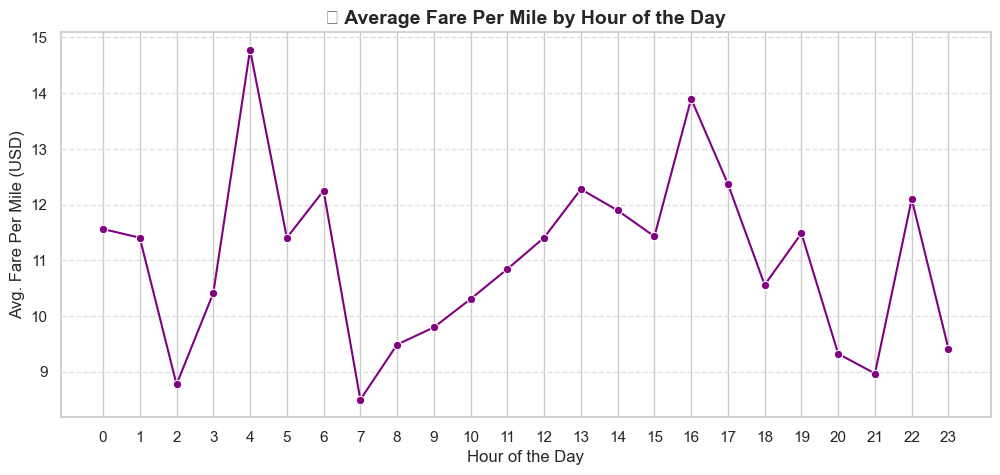

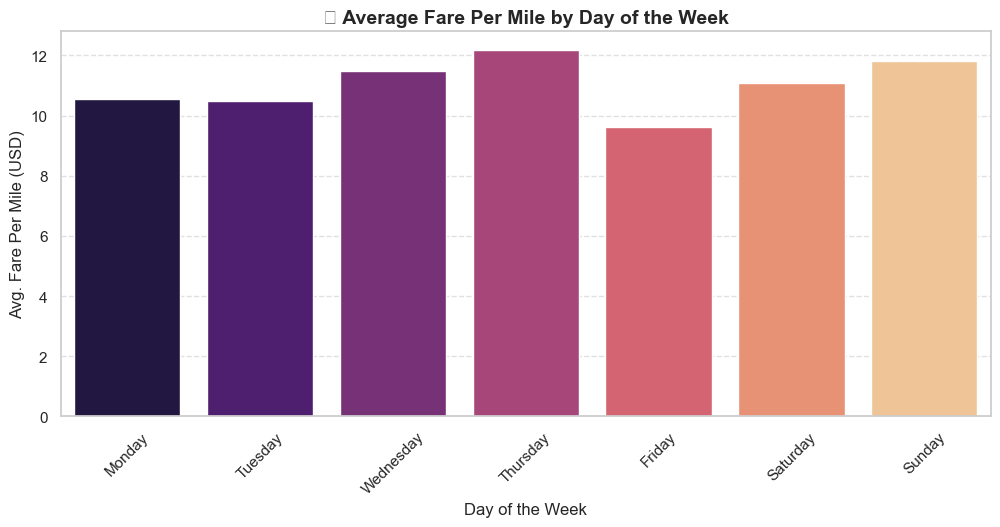

In [377]:
# Compare the average fare per mile for different days and for different times of the day

# Convert datetime columns to actual datetime format
taxi_zones_merged["tpep_pickup_datetime"] = pd.to_datetime(taxi_zones_merged["tpep_pickup_datetime"])

# Extract Hour and Day of the Week
taxi_zones_merged["pickup_hour"] = taxi_zones_merged["tpep_pickup_datetime"].dt.hour
taxi_zones_merged["pickup_day"] = taxi_zones_merged["tpep_pickup_datetime"].dt.day_name()

# Remove trips with zero/negative distance
valid_trips = taxi_zones_merged[taxi_zones_merged["trip_distance"] > 0]

# Calculate fare per mile
valid_trips["fare_per_mile"] = valid_trips["fare_amount"] / valid_trips["trip_distance"]

#  **1️ Group by Hour of the Day**
hourly_fare = valid_trips.groupby("pickup_hour")["fare_per_mile"].mean().reset_index()

#  **2️ Group by Day of the Week**
weekly_fare = valid_trips.groupby("pickup_day")["fare_per_mile"].mean().reset_index()

# Ensure correct weekday order
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_fare["pickup_day"] = pd.Categorical(weekly_fare["pickup_day"], categories=weekday_order, ordered=True)
weekly_fare = weekly_fare.sort_values("pickup_day")

# **Visualization: Average Fare Per Mile by Hour**
plt.figure(figsize=(12, 5))
sns.lineplot(x="pickup_hour", y="fare_per_mile", data=hourly_fare, marker="o", color="purple")
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Avg. Fare Per Mile (USD)", fontsize=12)
plt.title("⏰ Average Fare Per Mile by Hour of the Day", fontsize=14, fontweight="bold")
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# **Visualization: Average Fare Per Mile by Day of the Week**
plt.figure(figsize=(12, 5))
sns.barplot(x="pickup_day", y="fare_per_mile", data=weekly_fare, palette="magma")
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Avg. Fare Per Mile (USD)", fontsize=12)
plt.title("📆 Average Fare Per Mile by Day of the Week", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

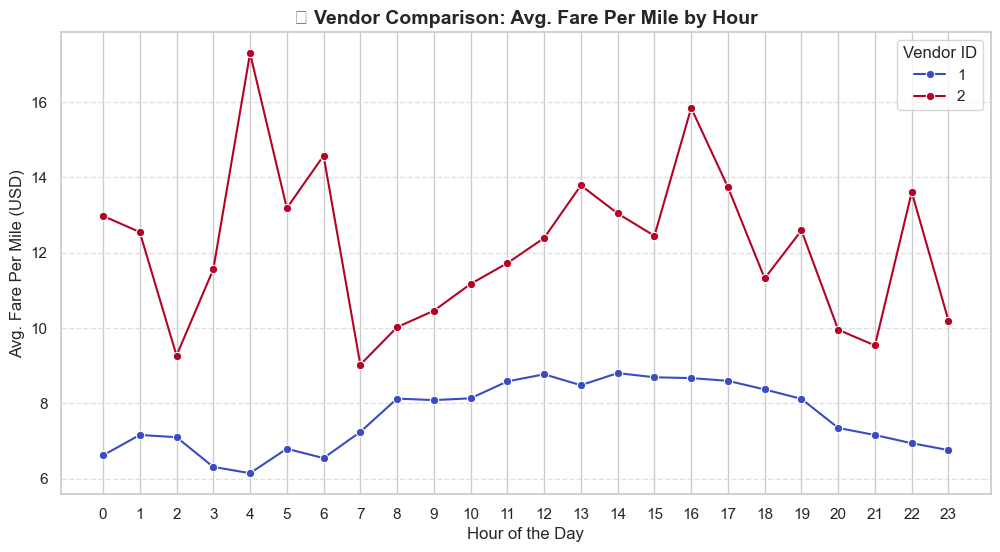

In [381]:
# Compare fare per mile for different vendors
# Convert datetime columns to actual datetime format
taxi_zones_merged["tpep_pickup_datetime"] = pd.to_datetime(taxi_zones_merged["tpep_pickup_datetime"])

# Extract Pickup Hour
taxi_zones_merged["pickup_hour"] = taxi_zones_merged["tpep_pickup_datetime"].dt.hour

# Remove trips with zero/negative distance
valid_trips = taxi_zones_merged[taxi_zones_merged["trip_distance"] > 0]

# Calculate fare per mile
valid_trips["fare_per_mile"] = valid_trips["fare_amount"] / valid_trips["trip_distance"]

# **Group by Vendor and Hour of the Day**
vendor_fare_hourly = valid_trips.groupby(["VendorID", "pickup_hour"])["fare_per_mile"].mean().reset_index()

# **Visualization: Compare Vendors' Average Fare Per Mile by Hour**
plt.figure(figsize=(12, 6))
sns.lineplot(x="pickup_hour", y="fare_per_mile", hue="VendorID", data=vendor_fare_hourly, marker="o", palette="coolwarm")
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Avg. Fare Per Mile (USD)", fontsize=12)
plt.title("Vendor Comparison: Avg. Fare Per Mile by Hour", fontsize=14, fontweight="bold")
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend(title="Vendor ID")
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


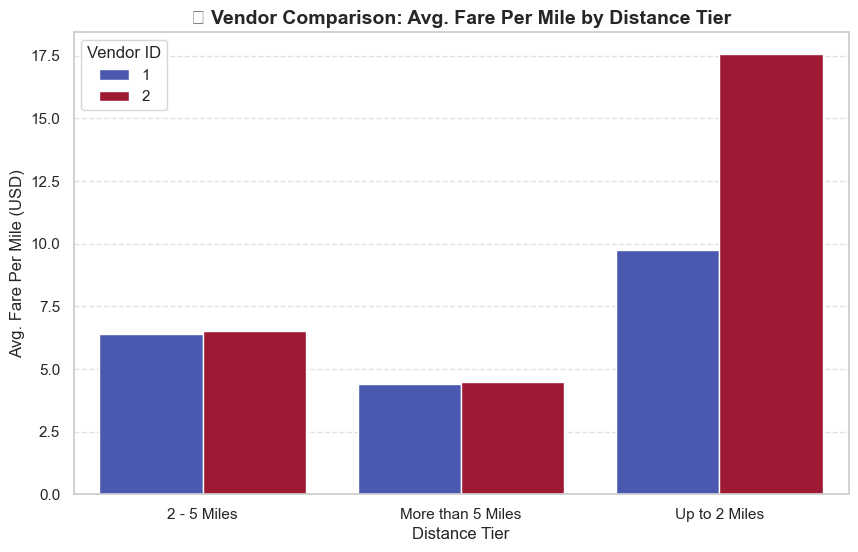

In [383]:
# Defining distance tiers
# Ensure datetime columns are in correct format
taxi_zones_merged["tpep_pickup_datetime"] = pd.to_datetime(taxi_zones_merged["tpep_pickup_datetime"])

# Remove trips with zero/negative distances to avoid errors
valid_trips = taxi_zones_merged[taxi_zones_merged["trip_distance"] > 0].copy()

# Calculate fare per mile
valid_trips["fare_per_mile"] = valid_trips["fare_amount"] / valid_trips["trip_distance"]

# Define distance tiers
def categorize_distance(distance):
    if distance <= 2:
        return "Up to 2 Miles"
    elif 2 < distance <= 5:
        return "2 - 5 Miles"
    else:
        return "More than 5 Miles"

# Apply the function to create a new column
valid_trips["Distance_Tier"] = valid_trips["trip_distance"].apply(categorize_distance)

# Group by Vendor and Distance Tier to get average fare per mile
vendor_fare_tiers = valid_trips.groupby(["VendorID", "Distance_Tier"])["fare_per_mile"].mean().reset_index()

# 📊 **Visualization: Compare Vendors' Fare Per Mile Across Distance Tiers**
plt.figure(figsize=(10, 6))
sns.barplot(x="Distance_Tier", y="fare_per_mile", hue="VendorID", data=vendor_fare_tiers, palette="coolwarm")

plt.xlabel("Distance Tier", fontsize=12)
plt.ylabel("Avg. Fare Per Mile (USD)", fontsize=12)
plt.title("🚖 Vendor Comparison: Avg. Fare Per Mile by Distance Tier", fontsize=14, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend(title="Vendor ID")
plt.show()



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

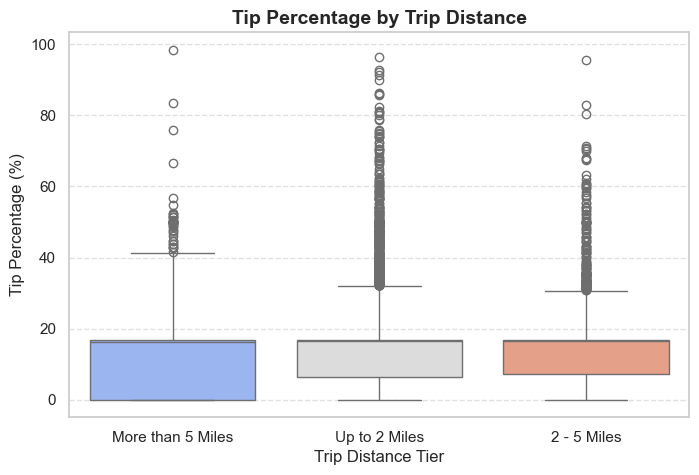

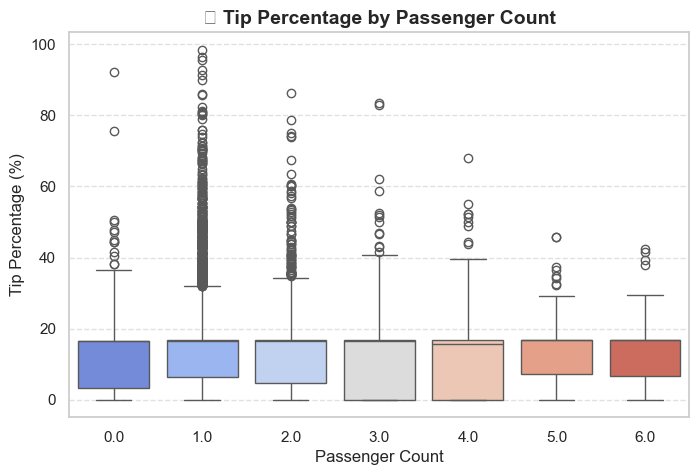

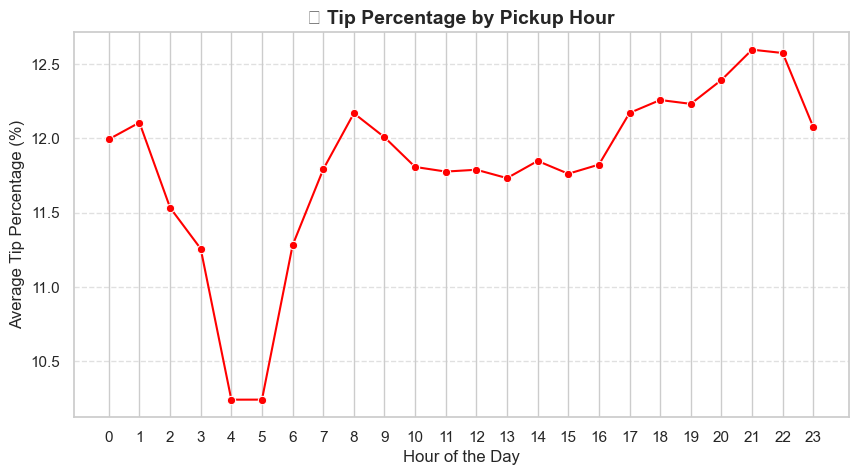

In [385]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
valid_trips = taxi_zones_merged[(taxi_zones_merged["fare_amount"] > 0) & (taxi_zones_merged["total_amount"] > 0)].copy()

# Calculate tip percentage
valid_trips["tip_percentage"] = (valid_trips["tip_amount"] / valid_trips["total_amount"]) * 100

# Categorize trip distances
def categorize_distance(distance):
    if distance <= 2:
        return "Up to 2 Miles"
    elif 2 < distance <= 5:
        return "2 - 5 Miles"
    else:
        return "More than 5 Miles"

valid_trips["Distance_Tier"] = valid_trips["trip_distance"].apply(categorize_distance)

# Extract pickup hour
valid_trips["pickup_hour"] = pd.to_datetime(valid_trips["tpep_pickup_datetime"]).dt.hour

# **📊 Visualization 1: Tip Percentage by Distance Tier**
plt.figure(figsize=(8, 5))
sns.boxplot(x="Distance_Tier", y="tip_percentage", data=valid_trips, palette="coolwarm")
plt.title("Tip Percentage by Trip Distance", fontsize=14, fontweight="bold")
plt.xlabel("Trip Distance Tier", fontsize=12)
plt.ylabel("Tip Percentage (%)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# **Visualization 2: Tip Percentage by Passenger Count**
plt.figure(figsize=(8, 5))
sns.boxplot(x="passenger_count", y="tip_percentage", data=valid_trips, palette="coolwarm")
plt.title("👥 Tip Percentage by Passenger Count", fontsize=14, fontweight="bold")
plt.xlabel("Passenger Count", fontsize=12)
plt.ylabel("Tip Percentage (%)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# **Visualization 3: Tip Percentage by Time of Pickup**
plt.figure(figsize=(10, 5))
sns.lineplot(x="pickup_hour", y="tip_percentage", data=valid_trips, estimator="mean", ci=None, marker="o", color="red")
plt.title("⏰ Tip Percentage by Pickup Hour", fontsize=14, fontweight="bold")
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Average Tip Percentage (%)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.xticks(range(0, 24))
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours


🔹 **Comparison of Low vs. High Tippers:**
                 Low Tippers (<10%)  High Tippers (>25%)
trip_distance              3.671248             2.372354
total_amount              26.505332            31.348685
passenger_count            1.379680             1.335169


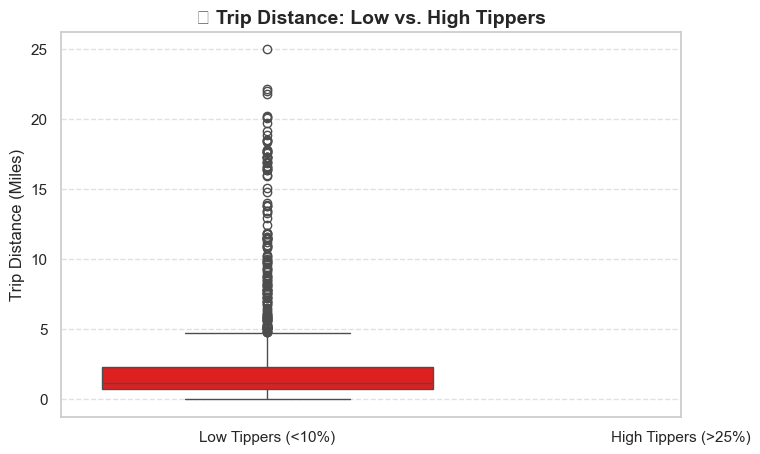

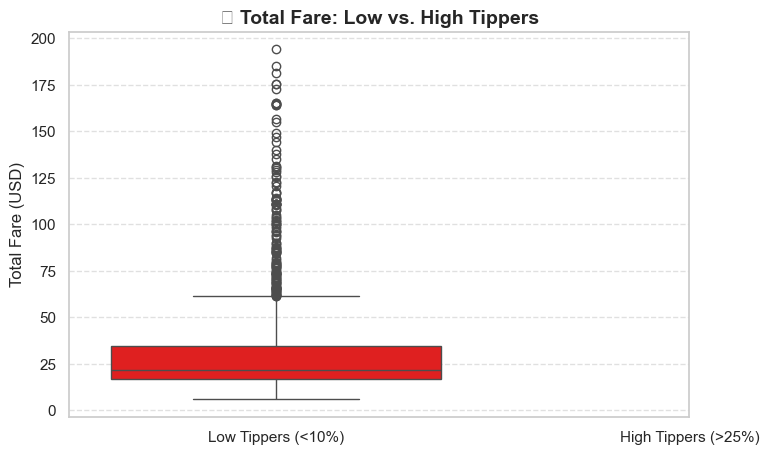

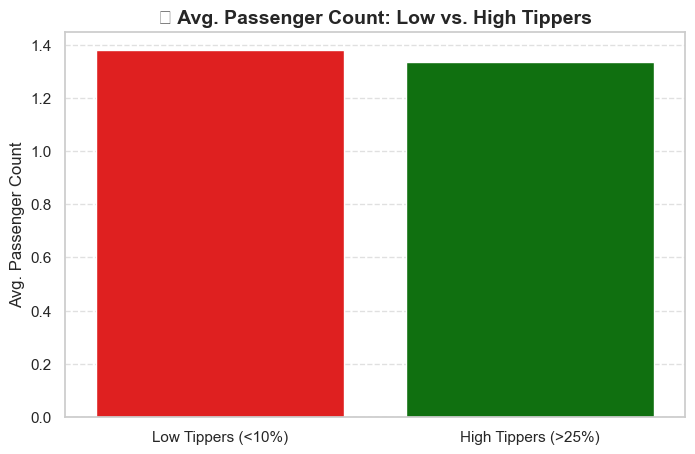

In [387]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
# Remove invalid trips (zero/negative fare or total amount)
valid_trips = taxi_zones_merged[(taxi_zones_merged["fare_amount"] > 0) & (taxi_zones_merged["total_amount"] > 0)].copy()

# Calculate tip percentage
valid_trips["tip_percentage"] = (valid_trips["tip_amount"] / valid_trips["total_amount"]) * 100

# Define tip categories
low_tippers = valid_trips[valid_trips["tip_percentage"] < 10]
high_tippers = valid_trips[valid_trips["tip_percentage"] > 25]

# Extract relevant statistics
low_tip_avg = low_tippers[["trip_distance", "total_amount", "passenger_count"]].mean()
high_tip_avg = high_tippers[["trip_distance", "total_amount", "passenger_count"]].mean()

# Combine into a DataFrame for comparison
comparison_df = pd.DataFrame({"Low Tippers (<10%)": low_tip_avg, "High Tippers (>25%)": high_tip_avg})
print("\n**Comparison of Low vs. High Tippers:**")
print(comparison_df)

# **Visualization 1: Trip Distance for Low vs. High Tippers**
plt.figure(figsize=(8, 5))
sns.boxplot(data=[low_tippers["trip_distance"], high_tippers["trip_distance"]], palette=["red", "green"])
plt.xticks([0, 1], ["Low Tippers (<10%)", "High Tippers (>25%)"])
plt.title("Trip Distance: Low vs. High Tippers", fontsize=14, fontweight="bold")
plt.ylabel("Trip Distance (Miles)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# **Visualization 2: Total Fare for Low vs. High Tippers**
plt.figure(figsize=(8, 5))
sns.boxplot(data=[low_tippers["total_amount"], high_tippers["total_amount"]], palette=["red", "green"])
plt.xticks([0, 1], ["Low Tippers (<10%)", "High Tippers (>25%)"])
plt.title("Total Fare: Low vs. High Tippers", fontsize=14, fontweight="bold")
plt.ylabel("Total Fare (USD)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# **Visualization 3: Passenger Count for Low vs. High Tippers**
plt.figure(figsize=(8, 5))
sns.barplot(x=["Low Tippers (<10%)", "High Tippers (>25%)"], y=[low_tip_avg["passenger_count"], high_tip_avg["passenger_count"]], palette=["red", "green"])
plt.title("Avg. Passenger Count: Low vs. High Tippers", fontsize=14, fontweight="bold")
plt.ylabel("Avg. Passenger Count", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

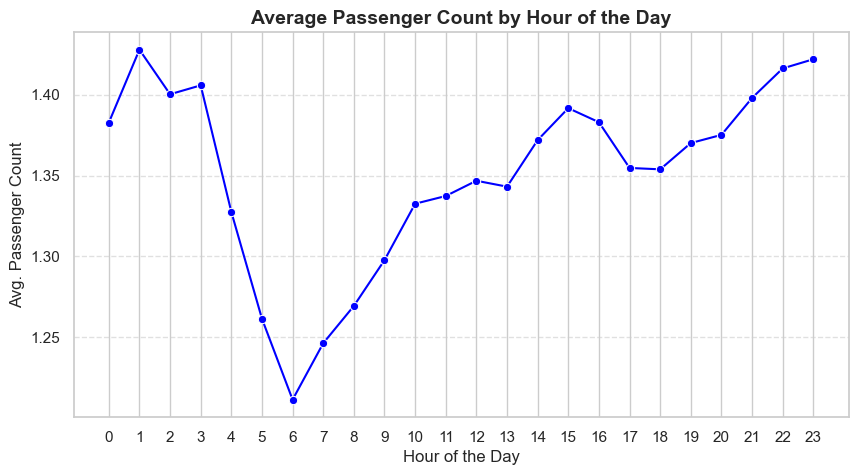

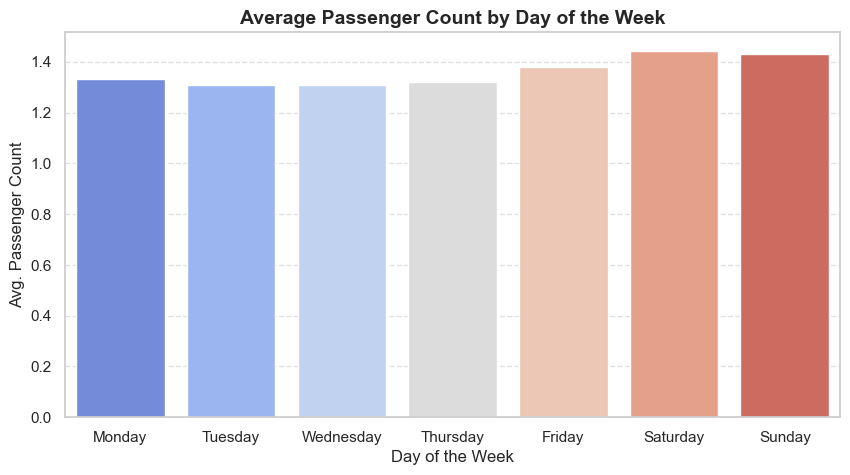

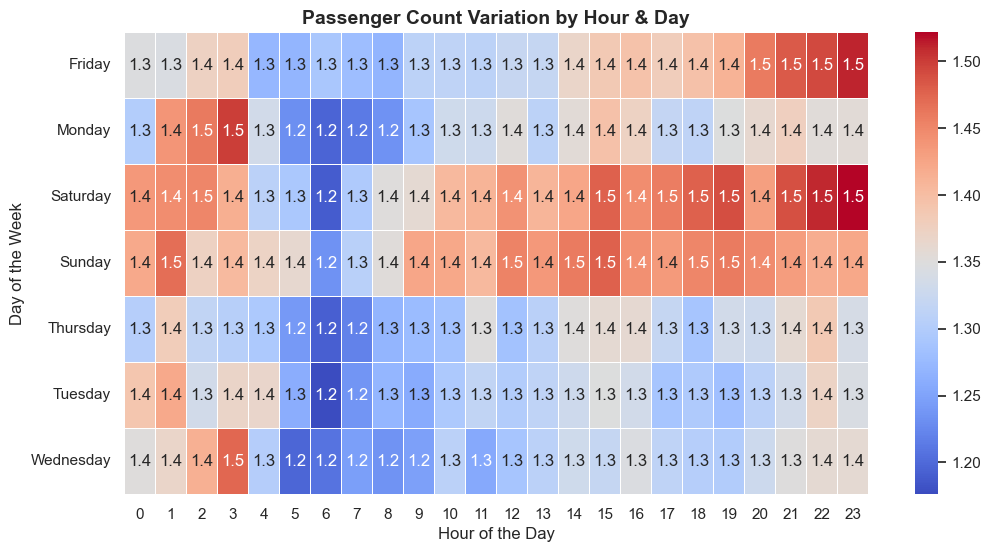

In [389]:
# Extract hour and day of the week
taxi_zones_merged["pickup_hour"] = pd.to_datetime(taxi_zones_merged["tpep_pickup_datetime"]).dt.hour
taxi_zones_merged["pickup_day"] = pd.to_datetime(taxi_zones_merged["tpep_pickup_datetime"]).dt.day_name()

# Group by hour and day to find average passenger count
hourly_passenger_avg = taxi_zones_merged.groupby("pickup_hour")["passenger_count"].mean()
daily_passenger_avg = taxi_zones_merged.groupby("pickup_day")["passenger_count"].mean()

# Reorder days for better visualization
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_passenger_avg = daily_passenger_avg.reindex(day_order)

# **Visualization 1: Average Passenger Count by Hour**
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_passenger_avg.index, y=hourly_passenger_avg.values, marker="o", color="blue")
plt.title("Average Passenger Count by Hour of the Day", fontsize=14, fontweight="bold")
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Avg. Passenger Count", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# **Visualization 2: Average Passenger Count by Day of the Week**
plt.figure(figsize=(10, 5))
sns.barplot(x=daily_passenger_avg.index, y=daily_passenger_avg.values, palette="coolwarm")
plt.title("Average Passenger Count by Day of the Week", fontsize=14, fontweight="bold")
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Avg. Passenger Count", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# **📊 Visualization 3: Heatmap - Passenger Count by Hour & Day**
pivot_table = taxi_zones_merged.pivot_table(index="pickup_day", columns="pickup_hour", values="passenger_count", aggfunc="mean")
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)
plt.title("Passenger Count Variation by Hour & Day", fontsize=14, fontweight="bold")
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Day of the Week", fontsize=12)
plt.show()

In [ ]:
# See how passenger count varies across hours and days




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

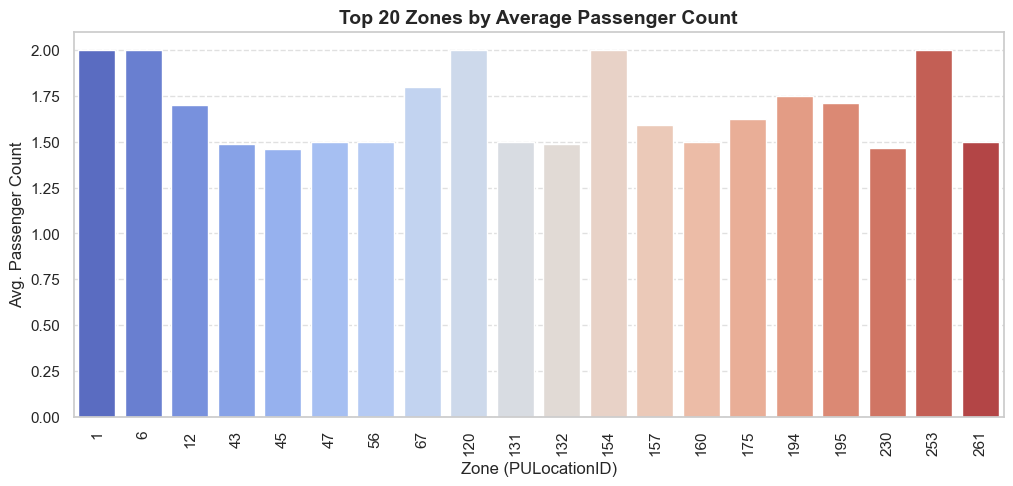

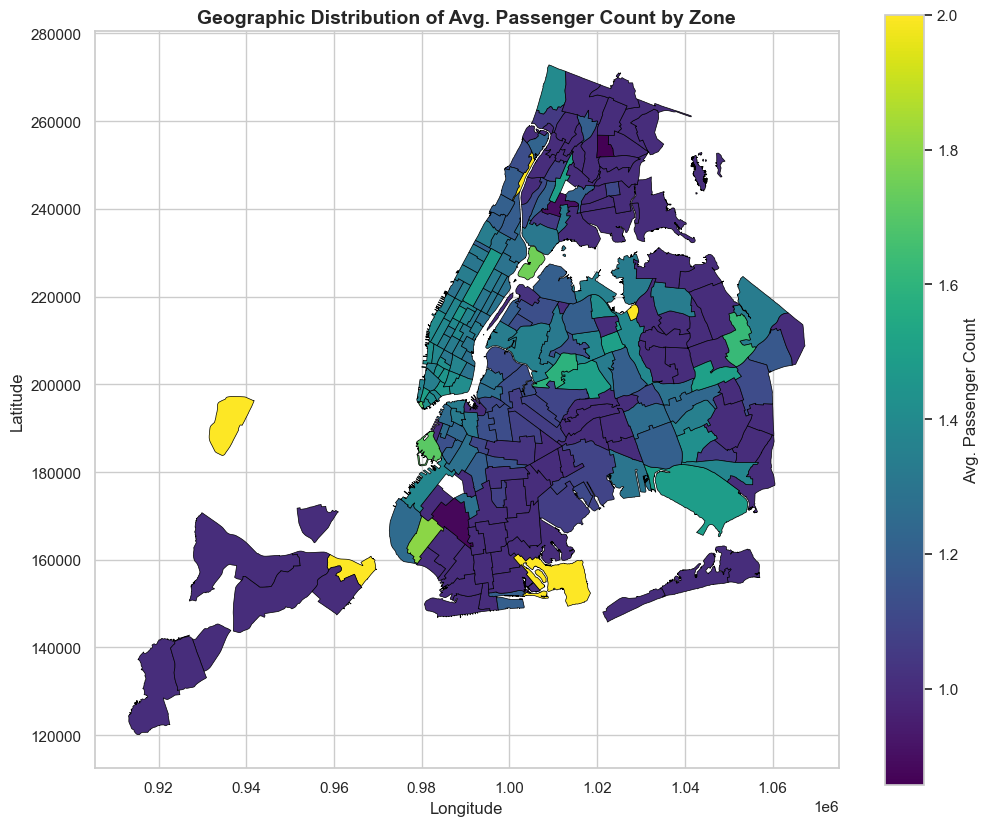

In [391]:
# How does passenger count vary across zones
zone_passenger_avg = taxi_zones_merged.groupby("PULocationID")["passenger_count"].mean().reset_index()

# Sort zones by average passenger count
zone_passenger_avg = zone_passenger_avg.sort_values(by="passenger_count", ascending=False)

# **📊 Visualization 1: Top 20 Zones by Avg. Passenger Count**
plt.figure(figsize=(12, 5))
sns.barplot(data=zone_passenger_avg.head(20), x="PULocationID", y="passenger_count", palette="coolwarm")
plt.title("Top 20 Zones by Average Passenger Count", fontsize=14, fontweight="bold")
plt.xlabel("Zone (PULocationID)", fontsize=12)
plt.ylabel("Avg. Passenger Count", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# **📊 Visualization 2: Geographic Heatmap**
import geopandas as gpd

# Merge with zone shapefile to get geographic data
zones_map = zones.merge(zone_passenger_avg, on="PULocationID")

# Define figure and axis
fig, ax = plt.subplots(figsize=(12, 10))
zones_map.plot(column="passenger_count", cmap="viridis", edgecolor="black", linewidth=0.5,
               legend=True, ax=ax, legend_kwds={'label': "Avg. Passenger Count", 'orientation': "vertical"})

# Title and labels
plt.title("Geographic Distribution of Avg. Passenger Count by Zone", fontsize=14, fontweight="bold")
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
plt.show()


In [395]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

avg_passenger_per_zone = taxi_zones_merged.groupby("PULocationID")["passenger_count"].mean().reset_index()

# Rename column for clarity
avg_passenger_per_zone.rename(columns={"passenger_count": "avg_passenger_count"}, inplace=True)

# Merge with zones GeoDataFrame
zones_with_trips = zones.merge(avg_passenger_per_zone, on="PULocationID", how="left")

# Fill NaN values (for zones with no trips) with 0
zones_with_trips["avg_passenger_count"].fillna(0, inplace=True)

# ✅ Check the updated GeoDataFrame
zones_with_trips.head()

OBJECTID  Shape_Leng  Shape_Area                   zone_x  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  num_trips                   zone_y  avg_passenger_count  
0           1.0       42.0           Newark Airport             2.000000  
1           NaN        0.0                      NaN             0.000000  
2           3.0       10.0  Allerton/Pelham Gardens             1.000000  
3           4.0      356.0            Alphabet City             1.292169  
4           5.0        2.0            Arden Heights             1.000000

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [409]:
taxi_zones_merged.columns.to_list()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_hour',
 'pickup_day',
 'pickup_month',
 'quarter',
 'trip_duration',
 'OBJECTID',
 'Shape_Leng',
 'Shape_Area',
 'zone',
 'LocationID',
 'borough',
 'geometry',
 'day_of_week',
 'dropoff_hour']

In [413]:
# Drop duplicate columns
taxi_zones_merged = taxi_zones_merged.drop(columns=['LocationID_dropoff', 'zone_dropoff'], errors='ignore')

# Verify that the columns are removed
print(taxi_zones_merged.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'pickup_hour', 'pickup_day',
       'pickup_month', 'quarter', 'trip_duration', 'OBJECTID', 'Shape_Leng',
       'Shape_Area', 'zone', 'LocationID', 'borough', 'geometry',
       'day_of_week', 'dropoff_hour'],
      dtype='object')


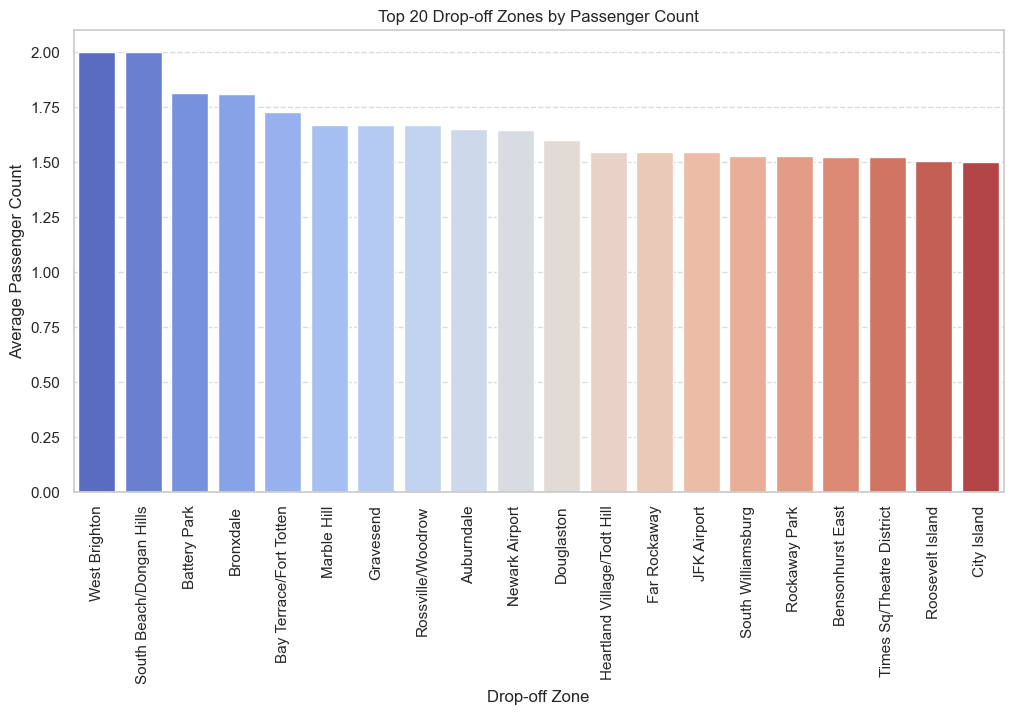

In [415]:
# How often is each surcharge applied?
# Count occurrences of extra charges per pickup zone
# Create a mapping of LocationID to Zone Name
location_to_zone = taxi_zones_merged[['LocationID', 'zone']].drop_duplicates()

# Merge drop-off location names into the dataset
taxi_zones_merged = taxi_zones_merged.merge(location_to_zone, left_on="DOLocationID", right_on="LocationID", how="left", suffixes=("", "_dropoff"))
# Group by Drop-off Zone Name instead of ID
avg_passenger_by_dropoff = taxi_zones_merged.groupby("zone_dropoff")["passenger_count"].mean().reset_index()

# Sort in descending order
avg_passenger_by_dropoff_sorted = avg_passenger_by_dropoff.sort_values(by="passenger_count", ascending=False)

# Plot top 20 drop-off zones
plt.figure(figsize=(12, 6))
sns.barplot(x="zone_dropoff", y="passenger_count", data=avg_passenger_by_dropoff_sorted.head(20), palette="coolwarm")
plt.xlabel("Drop-off Zone")
plt.ylabel("Average Passenger Count")
plt.title("Top 20 Drop-off Zones by Passenger Count")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

## **Strategies for Enhancing Taxi Operations**

- **improve Dispatch Efficiency** 
- Increase vehicle availability in **high-demand zones** during **peak hours (7 AM - 9 AM, 4 PM - 7 PM)** to reduce wait times.  
- Focus on **airports and residential areas** during **late-night hours (11 PM - 5 AM)** to meet demand.  
- Optimize routes by leveraging traffic data to **avoid congestion and minimize delays**.  

- **Optimize Pricing & Surcharges**
- Implement **dynamic pricing** based on peak hours and high-traffic locations.  
- Ensure **clear and upfront communication** about surcharges before customers confirm a ride.  

- **Enhance Customer Experience**
- Encourage tipping by offering **incentives for off-peak travel** and **high-rated drivers**.  
- Improve passenger comfort during busy hours with **personalized services** (e.g., complimentary water or in-ride entertainment).  

   **Manage Passenger Capacity** 
- Deploy **larger vehicles** during peak hours and special events to accommodate more passengers.  
- Use **historical demand data** to optimize fleet distribution and minimize wait times.  

Implementing these strategies will **enhance efficiency, maximize revenue, and improve overall customer satisfaction**.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

  ### **Optimized Strategic Positioning of Cabs Based on Trip Trends**  

- **Deploy Cabs in High-Demand Zones:**  
   - **Peak Hours (7 AM - 9 AM, 4 PM - 7 PM):** Position cabs near **business districts, train stations, and airports** to meet rush-hour demand.  
   - **Nighttime Demand (11 PM - 5 AM):** Prioritize **airports, nightlife districts, and residential areas** for late-night pickups.  
   - **Event-Based Demand:** Increase cab supply near **stadiums, concert venues, and theaters** before and after events.  

- **Adjust Fleet Based on Weekday vs. Weekend Trends:**  
   - **Weekdays:** Focus on **office zones in the morning** and **residential areas in the evening**.  
   - **Weekends:** Shift cabs to **shopping malls, nightlife areas, and entertainment hubs** from the evening onward.  
   - **Friday & Saturday Nights:** Increase fleet availability in **clubs, bars, and late-night dining areas**.  

- **Leverage Weather & Seasonal Demand:**  
   - **Bad Weather:** Keep cabs near **public transit hubs and shopping centers** to serve passengers avoiding walking in rain or snow.  
   - **Tourist Seasons & Holidays:** Increase cabs near **hotels, attractions, and major transport hubs**.  

- **Revenue & Surcharge Optimization:**  
   - **Congestion Zones:** Adjust cab placement in **high-surcharge areas** while suggesting alternate routes to avoid heavy traffic.  
   - **High-Fare Areas:** Prioritize high-revenue zones like **airports and central business districts** during peak hours.  

- **Manage Traffic Bottlenecks Effectively:**  
   - **Avoid highly congested areas during peak hours** unless necessary.  
   - **Utilize alternative routes** to optimize trip efficiency and reduce travel delays.  

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

### ** Data-Driven Pricing Strategy**  

- **Dynamic Pricing Based on Demand & Time:**  
   - **Peak Hours (7-9 AM, 4-7 PM):** Increase fares **1.5x-2x** in high-demand areas (business hubs, transit stations).  
   - **Nighttime (11 PM-5 AM):** Lower base fares but apply **higher surge pricing** in entertainment & airport zones.  
   - **Weekend/Holiday Premium:** Apply **10-20% extra charges** in tourist areas & event venues.
   - **Tipping Optimization:**  
   - Encourage higher tipping via **performance-based driver bonuses** & app suggestions (15%, 20%, 25%).  

- **Weather & Seasonal Pricing:**  
   - Apply **1.2x surge pricing** during **rain, snow, or extreme weather**.  

- **Distance-Based Fare Adjustments:**  
   - **Short trips (0-2 miles):** Keep fares low to attract customers.  
   - **Medium trips (2-5 miles):** Slightly higher rate per mile.  
   - **Long trips (>5 miles):** **Premium pricing** for airport & long-distance travel.  

- **Passenger-Based Pricing:**  
   - No extra charge for **1-2 passengers**.  
   - Apply a **$5 group surcharge** for **3+ passengers**.  

- **Incentivizing Off-Peak Travel:**  
   - Offer **10-20% fare discounts** for trips between **10 AM-4 PM & late-night hours**.  

- **Revenue from Surcharges:**  
   - **Traffic congestion surcharge** for high-density areas.  
  


